In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [2]:
df = pd.read_csv(path + 'train.csv')
df.head()

UNC_YEAR    HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017  190590         12    Algeria     4.605299e+10  1.948099e+10   
1      2017  190590         36  Australia     2.284420e+11  1.948099e+10   
2      2017  190590         40    Austria     1.664750e+11  1.948099e+10   
3      2017  190590         56    Belgium     4.064120e+11  1.948099e+10   
4      2017  190590         76     Brazil     1.507490e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
2         0.0   4403.247293    4.172380e+11       3.955690e+11      8797566   
3         0.0   3980.375563    5.026980e+11       4.757400e+11     11375158   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766             3416326.0   
1     1.304758            80.223690   8329.652344           438747025.0   
2          NaN            78.856460   8289.029297           453206357.0   
3          NaN            72.409200   8722.114258           706524512.0   
4     3.191389            55.382403  18364.505860            31329648.0   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
2                   335818  
3                   173709  
4                   122850

In [3]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)
idx = df[df['PA_NUS_FCRF'].isnull()].index
df = df.drop(idx)
idx = df[df['SNDIST'].isnull()].index
df = df.drop(idx)

# df["INC_DEC"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100

In [4]:
df.head()

UNC_YEAR    HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017  190590         12    Algeria     4.605299e+10  1.948099e+10   
1      2017  190590         36  Australia     2.284420e+11  1.948099e+10   
4      2017  190590         76     Brazil     1.507490e+11  1.948099e+10   
5      2017  190590        104    Myanmar     1.925344e+10  1.948099e+10   
6      2017  190590        124     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
4                   122850  
5                   631082  
6                  7273171

In [5]:
df = df.drop(columns = ['UNC_YEAR', 'COUNTRYNM'])#, 'KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD'])


In [6]:
df.head()

HSCD  COUNTRYCD  TRADE_COUNTRYCD    TRADE_HSCD  TARIFF_AVG        SNDIST  \
0  190590         12     4.605299e+10  1.948099e+10        30.0   3878.238437   
1  190590         36     2.284420e+11  1.948099e+10         0.0  12203.155980   
4  190590         76     1.507490e+11  1.948099e+10        18.0   9644.206941   
5  190590        104     1.925344e+10  1.948099e+10         5.0   5891.659995   
6  190590        124     4.324050e+11  1.948099e+10         0.0   7911.783801   

   NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  PA_NUS_FCRF  \
0    1.701630e+11       1.599950e+11     41389198   110.973017   
1    1.329190e+12       1.208850e+12     24601860     1.304758   
4    2.062830e+12       1.795700e+12    207833831     3.191389   
5    6.894587e+10       6.718424e+10     53382581  1360.358707   
6    1.649880e+12       1.528240e+12     36543321     1.297936   

   IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0            46.109810   9954.009766          3.416326e+06   
1            80.223690   8329.652344          4.387470e+08   
4            55.382403  18364.505860          3.132965e+07   
5            42.671390   3796.142578          1.276182e+07   
6            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
4                   122850  
5                   631082  
6                  7273171

<AxesSubplot:>

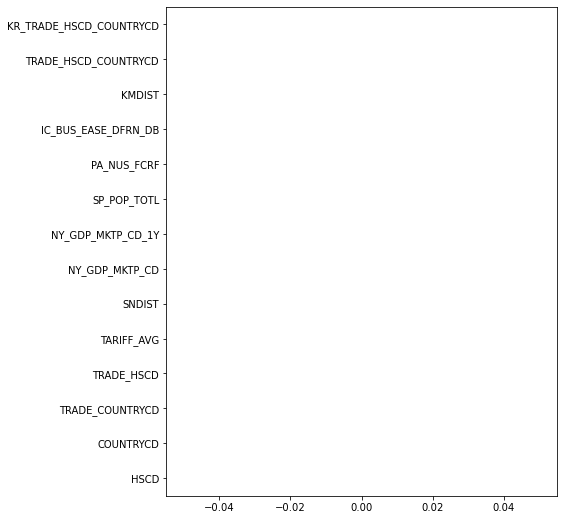

In [7]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [8]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(17269, 14)
10361 3454 3454


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

torch.manual_seed(1015)
device = torch.device("cuda")
df = df.sample(frac=1).reset_index(drop=False)

# Test Model

In [10]:
# print(df.iloc[:,0])
x_train = df.iloc[:tr+te,1:-1].values
y_train = df.iloc[:tr+te,-1].values

x_test = df.iloc[tr+te:,1:-1].values
y_test = df.iloc[tr+te:,-1].values

mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(13815, 13) (13815,)
(3454, 13) (3454,)


In [11]:
x_train.shape

(13815, 13)

In [12]:
x_train[0]

array([-2.03180588,  1.21365717, -0.09286722, -0.34330102,  0.11999049,
       -0.54168061, -0.3463211 , -0.34481896, -0.42110068, -0.30261229,
        0.67804113, -0.18285618, -0.09644765])

In [13]:
torch.set_printoptions(sci_mode=False)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.FloatTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test).to(device)
y_test = torch.FloatTensor(y_test).to(device)

dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

class DeepModel(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(DeepModel, self).__init__()

#         self.basic = nn.BatchNorm1d(in_channel)
        self.layer1 = nn.Linear(in_channel, 1024)
        self.dropout1 = nn.Dropout(0.5)
#         self.bn1 = nn.BatchNorm1d(1024)
        self.layer2 = nn.Linear(1024, 1024)
        self.dropout2 = nn.Dropout(0.5)
#         self.bn2 = nn.BatchNorm1d(1024)
        self.head = nn.Linear(1024, out_channel)

    def forward(self, x):
        x = x.to(device)
#         x = self.basic(x)
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
        x = F.relu(self.layer2(x))
        x = self.dropout2(x)

        return self.head(x)

sequence_length = x_train.shape[1]
input_size = x_train.shape[1]
hidden_size = 512
num_layers = 2
num_classes = 1
batch_size = 128

learning_rate = 0.01
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__() # 상속한 nn.Module에서 RNN에 해당하는 init 실행
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x): 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # (BATCH SIZE, SEQ_LENGTH, HIDDEN_SIZE)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # hidden state와 동일

        out, _ = self.lstm(x, (h0, c0)) # output : (BATCH_SIZE, SEQ_LENGTH, HIDDEN_SIZE) tensors. (hn, cn)은 필요 없으므로 받지 않고 _로 처리합니다. 

        out = self.fc(out[:, -1, :])
        return out


In [33]:
# Log MSE Loss
deepmodel = DeepModel(x_train.shape[1], 1).to(device)
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-2)
# optimizer = torch.optim.SGD(deepmodel.parameters(), lr=1e-3, momentum=0.9)


n_epochs = 50
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples

        pred = deepmodel(x_train).to(device)
        y_train = torch.log(y_train)
        y_train = y_train.reshape(-1,1)
        
#         print(pred)        
        pred = torch.clamp(pred, min=1e-5)
        pred = torch.log(pred)
        pred = pred.reshape(-1,1)
        
        
#         print(y_train)
#         print(pred)
#         import sys
#         sys.exit()
        
#         cost = torch.sqrt(torch.pow((torch.log(y_train) - torch.log(pred)), 2))
        cost = F.mse_loss(y_train, pred)
        loss_list.append(cost)
        with torch.no_grad():
            pred_y = deepmodel(x_test)
            test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/50  Batch 1/108  cost : 515.8179931640625
Ep 0/50  Batch 2/108  cost : 97.93014526367188
Ep 0/50  Batch 3/108  cost : 88.97882080078125
Ep 0/50  Batch 4/108  cost : 77.20350646972656
Ep 0/50  Batch 5/108  cost : 69.1573715209961
Ep 0/50  Batch 6/108  cost : 59.897071838378906
Ep 0/50  Batch 7/108  cost : 62.71757507324219
Ep 0/50  Batch 8/108  cost : 62.591949462890625
Ep 0/50  Batch 9/108  cost : 56.94000244140625
Ep 0/50  Batch 10/108  cost : 59.29436492919922
Ep 0/50  Batch 11/108  cost : 55.945762634277344
Ep 0/50  Batch 12/108  cost : 53.918731689453125
Ep 0/50  Batch 13/108  cost : 49.58699417114258
Ep 0/50  Batch 14/108  cost : 51.671287536621094
Ep 0/50  Batch 15/108  cost : 48.4344367980957
Ep 0/50  Batch 16/108  cost : 49.82878112792969
Ep 0/50  Batch 17/108  cost : 48.23655700683594
Ep 0/50  Batch 18/108  cost : 46.54750061035156
Ep 0/50  Batch 19/108  cost : 42.63530731201172
Ep 0/50  Batch 20/108  cost : 45.42298126220703
Ep 0/50  Batch 21/108  cost : 39.2579803466796

Ep 1/50  Batch 90/108  cost : 15.496245384216309
Ep 1/50  Batch 91/108  cost : 13.959413528442383
Ep 1/50  Batch 92/108  cost : 11.956188201904297
Ep 1/50  Batch 93/108  cost : 13.31308650970459
Ep 1/50  Batch 94/108  cost : 14.461856842041016
Ep 1/50  Batch 95/108  cost : 13.907588005065918
Ep 1/50  Batch 96/108  cost : 14.115791320800781
Ep 1/50  Batch 97/108  cost : 14.188018798828125
Ep 1/50  Batch 98/108  cost : 13.611438751220703
Ep 1/50  Batch 99/108  cost : 12.062828063964844
Ep 1/50  Batch 100/108  cost : 13.11750602722168
Ep 1/50  Batch 101/108  cost : 12.384246826171875
Ep 1/50  Batch 102/108  cost : 12.517712593078613
Ep 1/50  Batch 103/108  cost : 13.400884628295898
Ep 1/50  Batch 104/108  cost : 14.463837623596191
Ep 1/50  Batch 105/108  cost : 10.154096603393555
Ep 1/50  Batch 106/108  cost : 15.126812934875488
Ep 1/50  Batch 107/108  cost : 11.211477279663086
Ep 1/50  Batch 108/108  cost : 13.05877685546875
Ep 2/50  Batch 1/108  cost : 12.204019546508789
Ep 2/50  Batch 

Ep 3/50  Batch 69/108  cost : 8.710403442382812
Ep 3/50  Batch 70/108  cost : 10.186001777648926
Ep 3/50  Batch 71/108  cost : 9.711437225341797
Ep 3/50  Batch 72/108  cost : 8.793937683105469
Ep 3/50  Batch 73/108  cost : 10.078227043151855
Ep 3/50  Batch 74/108  cost : 9.316200256347656
Ep 3/50  Batch 75/108  cost : 11.087963104248047
Ep 3/50  Batch 76/108  cost : 10.441973686218262
Ep 3/50  Batch 77/108  cost : 10.528215408325195
Ep 3/50  Batch 78/108  cost : 8.898273468017578
Ep 3/50  Batch 79/108  cost : 9.313302040100098
Ep 3/50  Batch 80/108  cost : 8.79115104675293
Ep 3/50  Batch 81/108  cost : 11.785733222961426
Ep 3/50  Batch 82/108  cost : 7.422527313232422
Ep 3/50  Batch 83/108  cost : 10.254983901977539
Ep 3/50  Batch 84/108  cost : 8.893230438232422
Ep 3/50  Batch 85/108  cost : 7.497352600097656
Ep 3/50  Batch 86/108  cost : 8.266191482543945
Ep 3/50  Batch 87/108  cost : 9.638795852661133
Ep 3/50  Batch 88/108  cost : 10.070167541503906
Ep 3/50  Batch 89/108  cost : 9.2

Ep 5/50  Batch 50/108  cost : 7.947737693786621
Ep 5/50  Batch 51/108  cost : 8.412994384765625
Ep 5/50  Batch 52/108  cost : 8.65764045715332
Ep 5/50  Batch 53/108  cost : 7.89675235748291
Ep 5/50  Batch 54/108  cost : 7.2762861251831055
Ep 5/50  Batch 55/108  cost : 7.480286598205566
Ep 5/50  Batch 56/108  cost : 7.3642473220825195
Ep 5/50  Batch 57/108  cost : 6.996514797210693
Ep 5/50  Batch 58/108  cost : 6.6258697509765625
Ep 5/50  Batch 59/108  cost : 8.325292587280273
Ep 5/50  Batch 60/108  cost : 10.038188934326172
Ep 5/50  Batch 61/108  cost : 7.204583168029785
Ep 5/50  Batch 62/108  cost : 7.637103080749512
Ep 5/50  Batch 63/108  cost : 5.873845100402832
Ep 5/50  Batch 64/108  cost : 9.351210594177246
Ep 5/50  Batch 65/108  cost : 7.428103923797607
Ep 5/50  Batch 66/108  cost : 8.601651191711426
Ep 5/50  Batch 67/108  cost : 6.598533630371094
Ep 5/50  Batch 68/108  cost : 7.897608757019043
Ep 5/50  Batch 69/108  cost : 9.147371292114258
Ep 5/50  Batch 70/108  cost : 8.269836

Ep 7/50  Batch 29/108  cost : 7.592978477478027
Ep 7/50  Batch 30/108  cost : 7.75214958190918
Ep 7/50  Batch 31/108  cost : 6.933407306671143
Ep 7/50  Batch 32/108  cost : 8.528386116027832
Ep 7/50  Batch 33/108  cost : 7.459870338439941
Ep 7/50  Batch 34/108  cost : 8.288995742797852
Ep 7/50  Batch 35/108  cost : 7.876720428466797
Ep 7/50  Batch 36/108  cost : 9.0149564743042
Ep 7/50  Batch 37/108  cost : 7.420146465301514
Ep 7/50  Batch 38/108  cost : 6.6745500564575195
Ep 7/50  Batch 39/108  cost : 8.715644836425781
Ep 7/50  Batch 40/108  cost : 6.936666011810303
Ep 7/50  Batch 41/108  cost : 8.871746063232422
Ep 7/50  Batch 42/108  cost : 6.932233810424805
Ep 7/50  Batch 43/108  cost : 6.918402194976807
Ep 7/50  Batch 44/108  cost : 8.325918197631836
Ep 7/50  Batch 45/108  cost : 6.768298149108887
Ep 7/50  Batch 46/108  cost : 6.886748790740967
Ep 7/50  Batch 47/108  cost : 5.773219108581543
Ep 7/50  Batch 48/108  cost : 6.42315149307251
Ep 7/50  Batch 49/108  cost : 7.64011192321

Ep 9/50  Batch 8/108  cost : 8.043464660644531
Ep 9/50  Batch 9/108  cost : 6.122727394104004
Ep 9/50  Batch 10/108  cost : 7.663377285003662
Ep 9/50  Batch 11/108  cost : 7.358809947967529
Ep 9/50  Batch 12/108  cost : 7.017578125
Ep 9/50  Batch 13/108  cost : 6.688767910003662
Ep 9/50  Batch 14/108  cost : 7.002008438110352
Ep 9/50  Batch 15/108  cost : 6.58036994934082
Ep 9/50  Batch 16/108  cost : 6.687861442565918
Ep 9/50  Batch 17/108  cost : 7.505837917327881
Ep 9/50  Batch 18/108  cost : 5.979454040527344
Ep 9/50  Batch 19/108  cost : 6.424765110015869
Ep 9/50  Batch 20/108  cost : 8.007736206054688
Ep 9/50  Batch 21/108  cost : 6.3265838623046875
Ep 9/50  Batch 22/108  cost : 7.799358367919922
Ep 9/50  Batch 23/108  cost : 5.452180862426758
Ep 9/50  Batch 24/108  cost : 7.307043075561523
Ep 9/50  Batch 25/108  cost : 7.789012908935547
Ep 9/50  Batch 26/108  cost : 7.433181285858154
Ep 9/50  Batch 27/108  cost : 6.314179420471191
Ep 9/50  Batch 28/108  cost : 7.039018630981445


Ep 10/50  Batch 95/108  cost : 5.543550491333008
Ep 10/50  Batch 96/108  cost : 6.469597816467285
Ep 10/50  Batch 97/108  cost : 5.5641632080078125
Ep 10/50  Batch 98/108  cost : 6.328296661376953
Ep 10/50  Batch 99/108  cost : 6.709323406219482
Ep 10/50  Batch 100/108  cost : 6.028736114501953
Ep 10/50  Batch 101/108  cost : 7.800809860229492
Ep 10/50  Batch 102/108  cost : 6.62595796585083
Ep 10/50  Batch 103/108  cost : 6.599488258361816
Ep 10/50  Batch 104/108  cost : 5.849054336547852
Ep 10/50  Batch 105/108  cost : 7.426477432250977
Ep 10/50  Batch 106/108  cost : 7.427127361297607
Ep 10/50  Batch 107/108  cost : 6.7880964279174805
Ep 10/50  Batch 108/108  cost : 6.600968360900879
Ep 11/50  Batch 1/108  cost : 6.576664924621582
Ep 11/50  Batch 2/108  cost : 5.879737377166748
Ep 11/50  Batch 3/108  cost : 7.487301826477051
Ep 11/50  Batch 4/108  cost : 6.5798563957214355
Ep 11/50  Batch 5/108  cost : 6.251603126525879
Ep 11/50  Batch 6/108  cost : 6.3894147872924805
Ep 11/50  Batc

Ep 12/50  Batch 76/108  cost : 4.975600719451904
Ep 12/50  Batch 77/108  cost : 6.088492393493652
Ep 12/50  Batch 78/108  cost : 6.244589805603027
Ep 12/50  Batch 79/108  cost : 5.267688751220703
Ep 12/50  Batch 80/108  cost : 6.373818397521973
Ep 12/50  Batch 81/108  cost : 7.861591339111328
Ep 12/50  Batch 82/108  cost : 7.192931652069092
Ep 12/50  Batch 83/108  cost : 7.387085437774658
Ep 12/50  Batch 84/108  cost : 6.350668907165527
Ep 12/50  Batch 85/108  cost : 5.811734199523926
Ep 12/50  Batch 86/108  cost : 6.210249900817871
Ep 12/50  Batch 87/108  cost : 6.210366249084473
Ep 12/50  Batch 88/108  cost : 6.599985122680664
Ep 12/50  Batch 89/108  cost : 7.135089874267578
Ep 12/50  Batch 90/108  cost : 5.648773193359375
Ep 12/50  Batch 91/108  cost : 5.748353004455566
Ep 12/50  Batch 92/108  cost : 6.933472633361816
Ep 12/50  Batch 93/108  cost : 6.684659004211426
Ep 12/50  Batch 94/108  cost : 6.663944244384766
Ep 12/50  Batch 95/108  cost : 7.745087623596191
Ep 12/50  Batch 96/1

Ep 14/50  Batch 56/108  cost : 5.483763694763184
Ep 14/50  Batch 57/108  cost : 6.1137285232543945
Ep 14/50  Batch 58/108  cost : 6.912912368774414
Ep 14/50  Batch 59/108  cost : 6.377814769744873
Ep 14/50  Batch 60/108  cost : 5.645407676696777
Ep 14/50  Batch 61/108  cost : 5.074928283691406
Ep 14/50  Batch 62/108  cost : 6.6821064949035645
Ep 14/50  Batch 63/108  cost : 6.237322807312012
Ep 14/50  Batch 64/108  cost : 6.523581027984619
Ep 14/50  Batch 65/108  cost : 6.348445892333984
Ep 14/50  Batch 66/108  cost : 3.62790584564209
Ep 14/50  Batch 67/108  cost : 8.319063186645508
Ep 14/50  Batch 68/108  cost : 5.95224142074585
Ep 14/50  Batch 69/108  cost : 6.234590530395508
Ep 14/50  Batch 70/108  cost : 6.611151695251465
Ep 14/50  Batch 71/108  cost : 7.60108757019043
Ep 14/50  Batch 72/108  cost : 5.061605453491211
Ep 14/50  Batch 73/108  cost : 4.48077917098999
Ep 14/50  Batch 74/108  cost : 7.775331497192383
Ep 14/50  Batch 75/108  cost : 6.0211076736450195
Ep 14/50  Batch 76/10

Ep 16/50  Batch 38/108  cost : 5.190192699432373
Ep 16/50  Batch 39/108  cost : 5.006050109863281
Ep 16/50  Batch 40/108  cost : 4.405527591705322
Ep 16/50  Batch 41/108  cost : 4.5850934982299805
Ep 16/50  Batch 42/108  cost : 5.678989887237549
Ep 16/50  Batch 43/108  cost : 6.442566871643066
Ep 16/50  Batch 44/108  cost : 6.905490875244141
Ep 16/50  Batch 45/108  cost : 6.203447341918945
Ep 16/50  Batch 46/108  cost : 5.9661359786987305
Ep 16/50  Batch 47/108  cost : 5.437850475311279
Ep 16/50  Batch 48/108  cost : 7.911840915679932
Ep 16/50  Batch 49/108  cost : 6.259690284729004
Ep 16/50  Batch 50/108  cost : 5.161083698272705
Ep 16/50  Batch 51/108  cost : 7.1654791831970215
Ep 16/50  Batch 52/108  cost : 5.7724761962890625
Ep 16/50  Batch 53/108  cost : 5.665191650390625
Ep 16/50  Batch 54/108  cost : 6.9528608322143555
Ep 16/50  Batch 55/108  cost : 6.488675594329834
Ep 16/50  Batch 56/108  cost : 6.261805534362793
Ep 16/50  Batch 57/108  cost : 5.72561502456665
Ep 16/50  Batch 

Ep 18/50  Batch 17/108  cost : 5.099334239959717
Ep 18/50  Batch 18/108  cost : 7.81761360168457
Ep 18/50  Batch 19/108  cost : 4.4125285148620605
Ep 18/50  Batch 20/108  cost : 4.952916145324707
Ep 18/50  Batch 21/108  cost : 5.211510181427002
Ep 18/50  Batch 22/108  cost : 5.633862495422363
Ep 18/50  Batch 23/108  cost : 5.1057024002075195
Ep 18/50  Batch 24/108  cost : 6.092070579528809
Ep 18/50  Batch 25/108  cost : 5.200275421142578
Ep 18/50  Batch 26/108  cost : 5.226014614105225
Ep 18/50  Batch 27/108  cost : 6.873173713684082
Ep 18/50  Batch 28/108  cost : 5.153984069824219
Ep 18/50  Batch 29/108  cost : 5.688777923583984
Ep 18/50  Batch 30/108  cost : 4.495525360107422
Ep 18/50  Batch 31/108  cost : 5.810827732086182
Ep 18/50  Batch 32/108  cost : 6.925243377685547
Ep 18/50  Batch 33/108  cost : 5.656976222991943
Ep 18/50  Batch 34/108  cost : 5.7255449295043945
Ep 18/50  Batch 35/108  cost : 6.690683364868164
Ep 18/50  Batch 36/108  cost : 5.796032905578613
Ep 18/50  Batch 37

Ep 19/50  Batch 104/108  cost : 6.011886119842529
Ep 19/50  Batch 105/108  cost : 6.141172409057617
Ep 19/50  Batch 106/108  cost : 5.9304914474487305
Ep 19/50  Batch 107/108  cost : 5.4065141677856445
Ep 19/50  Batch 108/108  cost : 5.007266998291016
Ep 20/50  Batch 1/108  cost : 4.3668012619018555
Ep 20/50  Batch 2/108  cost : 5.760547637939453
Ep 20/50  Batch 3/108  cost : 6.181675910949707
Ep 20/50  Batch 4/108  cost : 6.381620407104492
Ep 20/50  Batch 5/108  cost : 6.021977424621582
Ep 20/50  Batch 6/108  cost : 5.725308418273926
Ep 20/50  Batch 7/108  cost : 5.811885833740234
Ep 20/50  Batch 8/108  cost : 6.129909515380859
Ep 20/50  Batch 9/108  cost : 4.55579948425293
Ep 20/50  Batch 10/108  cost : 4.102935314178467
Ep 20/50  Batch 11/108  cost : 5.297762870788574
Ep 20/50  Batch 12/108  cost : 6.029653549194336
Ep 20/50  Batch 13/108  cost : 5.360989570617676
Ep 20/50  Batch 14/108  cost : 5.592763900756836
Ep 20/50  Batch 15/108  cost : 6.425853252410889
Ep 20/50  Batch 16/108

Ep 21/50  Batch 86/108  cost : 5.356767177581787
Ep 21/50  Batch 87/108  cost : 4.739961624145508
Ep 21/50  Batch 88/108  cost : 6.477300643920898
Ep 21/50  Batch 89/108  cost : 4.891971588134766
Ep 21/50  Batch 90/108  cost : 4.969826698303223
Ep 21/50  Batch 91/108  cost : 7.044858932495117
Ep 21/50  Batch 92/108  cost : 6.121916770935059
Ep 21/50  Batch 93/108  cost : 4.951342582702637
Ep 21/50  Batch 94/108  cost : 6.100395202636719
Ep 21/50  Batch 95/108  cost : 5.765829086303711
Ep 21/50  Batch 96/108  cost : 6.057830333709717
Ep 21/50  Batch 97/108  cost : 5.624468803405762
Ep 21/50  Batch 98/108  cost : 5.119180679321289
Ep 21/50  Batch 99/108  cost : 4.885971546173096
Ep 21/50  Batch 100/108  cost : 6.352643966674805
Ep 21/50  Batch 101/108  cost : 4.496788024902344
Ep 21/50  Batch 102/108  cost : 4.897209644317627
Ep 21/50  Batch 103/108  cost : 5.629279136657715
Ep 21/50  Batch 104/108  cost : 5.85739803314209
Ep 21/50  Batch 105/108  cost : 3.866338014602661
Ep 21/50  Batch

Ep 23/50  Batch 68/108  cost : 5.5998406410217285
Ep 23/50  Batch 69/108  cost : 4.992191314697266
Ep 23/50  Batch 70/108  cost : 5.468779563903809
Ep 23/50  Batch 71/108  cost : 4.096736907958984
Ep 23/50  Batch 72/108  cost : 6.676298141479492
Ep 23/50  Batch 73/108  cost : 6.565983772277832
Ep 23/50  Batch 74/108  cost : 5.066926002502441
Ep 23/50  Batch 75/108  cost : 6.010563850402832
Ep 23/50  Batch 76/108  cost : 4.339183330535889
Ep 23/50  Batch 77/108  cost : 5.135639190673828
Ep 23/50  Batch 78/108  cost : 5.011382579803467
Ep 23/50  Batch 79/108  cost : 4.663990497589111
Ep 23/50  Batch 80/108  cost : 5.990237236022949
Ep 23/50  Batch 81/108  cost : 4.446047782897949
Ep 23/50  Batch 82/108  cost : 5.382452011108398
Ep 23/50  Batch 83/108  cost : 4.484701156616211
Ep 23/50  Batch 84/108  cost : 5.282004356384277
Ep 23/50  Batch 85/108  cost : 4.983188152313232
Ep 23/50  Batch 86/108  cost : 4.9924821853637695
Ep 23/50  Batch 87/108  cost : 5.033614158630371
Ep 23/50  Batch 88

Ep 25/50  Batch 48/108  cost : 5.231714248657227
Ep 25/50  Batch 49/108  cost : 4.426977157592773
Ep 25/50  Batch 50/108  cost : 4.113248825073242
Ep 25/50  Batch 51/108  cost : 5.985356330871582
Ep 25/50  Batch 52/108  cost : 5.289796829223633
Ep 25/50  Batch 53/108  cost : 4.2787017822265625
Ep 25/50  Batch 54/108  cost : 4.7042460441589355
Ep 25/50  Batch 55/108  cost : 5.143222808837891
Ep 25/50  Batch 56/108  cost : 4.843015193939209
Ep 25/50  Batch 57/108  cost : 4.208409309387207
Ep 25/50  Batch 58/108  cost : 7.63560676574707
Ep 25/50  Batch 59/108  cost : 4.035524845123291
Ep 25/50  Batch 60/108  cost : 4.961452007293701
Ep 25/50  Batch 61/108  cost : 5.067324638366699
Ep 25/50  Batch 62/108  cost : 5.330432891845703
Ep 25/50  Batch 63/108  cost : 5.044031620025635
Ep 25/50  Batch 64/108  cost : 5.52338981628418
Ep 25/50  Batch 65/108  cost : 6.076225757598877
Ep 25/50  Batch 66/108  cost : 5.4392571449279785
Ep 25/50  Batch 67/108  cost : 5.316169738769531
Ep 25/50  Batch 68/

Ep 27/50  Batch 30/108  cost : 4.036124229431152
Ep 27/50  Batch 31/108  cost : 4.698709487915039
Ep 27/50  Batch 32/108  cost : 4.598885536193848
Ep 27/50  Batch 33/108  cost : 5.158918380737305
Ep 27/50  Batch 34/108  cost : 4.177873611450195
Ep 27/50  Batch 35/108  cost : 7.067643165588379
Ep 27/50  Batch 36/108  cost : 4.632264614105225
Ep 27/50  Batch 37/108  cost : 5.661909580230713
Ep 27/50  Batch 38/108  cost : 4.758130073547363
Ep 27/50  Batch 39/108  cost : 5.2189154624938965
Ep 27/50  Batch 40/108  cost : 5.121038436889648
Ep 27/50  Batch 41/108  cost : 4.535669326782227
Ep 27/50  Batch 42/108  cost : 4.886682033538818
Ep 27/50  Batch 43/108  cost : 4.744722366333008
Ep 27/50  Batch 44/108  cost : 5.577916145324707
Ep 27/50  Batch 45/108  cost : 5.90726375579834
Ep 27/50  Batch 46/108  cost : 3.7685203552246094
Ep 27/50  Batch 47/108  cost : 5.19332218170166
Ep 27/50  Batch 48/108  cost : 5.846941947937012
Ep 27/50  Batch 49/108  cost : 5.595396041870117
Ep 27/50  Batch 50/1

Ep 29/50  Batch 10/108  cost : 5.773322105407715
Ep 29/50  Batch 11/108  cost : 5.486185550689697
Ep 29/50  Batch 12/108  cost : 4.318964004516602
Ep 29/50  Batch 13/108  cost : 4.684497356414795
Ep 29/50  Batch 14/108  cost : 5.086123466491699
Ep 29/50  Batch 15/108  cost : 6.03033447265625
Ep 29/50  Batch 16/108  cost : 5.946714878082275
Ep 29/50  Batch 17/108  cost : 5.965627193450928
Ep 29/50  Batch 18/108  cost : 4.617565631866455
Ep 29/50  Batch 19/108  cost : 5.5777668952941895
Ep 29/50  Batch 20/108  cost : 5.004581928253174
Ep 29/50  Batch 21/108  cost : 5.06503963470459
Ep 29/50  Batch 22/108  cost : 5.068855285644531
Ep 29/50  Batch 23/108  cost : 3.4790477752685547
Ep 29/50  Batch 24/108  cost : 5.998472213745117
Ep 29/50  Batch 25/108  cost : 6.005352020263672
Ep 29/50  Batch 26/108  cost : 5.486400127410889
Ep 29/50  Batch 27/108  cost : 5.4489521980285645
Ep 29/50  Batch 28/108  cost : 5.222034454345703
Ep 29/50  Batch 29/108  cost : 5.455423355102539
Ep 29/50  Batch 30/

Ep 30/50  Batch 98/108  cost : 5.000862121582031
Ep 30/50  Batch 99/108  cost : 5.286429405212402
Ep 30/50  Batch 100/108  cost : 6.9159979820251465
Ep 30/50  Batch 101/108  cost : 4.21253776550293
Ep 30/50  Batch 102/108  cost : 4.767925262451172
Ep 30/50  Batch 103/108  cost : 5.560149192810059
Ep 30/50  Batch 104/108  cost : 4.290376663208008
Ep 30/50  Batch 105/108  cost : 8.038871765136719
Ep 30/50  Batch 106/108  cost : 3.362844467163086
Ep 30/50  Batch 107/108  cost : 5.603341102600098
Ep 30/50  Batch 108/108  cost : 6.996571063995361
Ep 31/50  Batch 1/108  cost : 4.874475955963135
Ep 31/50  Batch 2/108  cost : 5.613361835479736
Ep 31/50  Batch 3/108  cost : 5.353124618530273
Ep 31/50  Batch 4/108  cost : 6.272515296936035
Ep 31/50  Batch 5/108  cost : 5.7539873123168945
Ep 31/50  Batch 6/108  cost : 5.4322333335876465
Ep 31/50  Batch 7/108  cost : 5.816150188446045
Ep 31/50  Batch 8/108  cost : 4.109596252441406
Ep 31/50  Batch 9/108  cost : 5.095066070556641
Ep 31/50  Batch 10

Ep 32/50  Batch 77/108  cost : 4.999382019042969
Ep 32/50  Batch 78/108  cost : 4.435101509094238
Ep 32/50  Batch 79/108  cost : 4.815009117126465
Ep 32/50  Batch 80/108  cost : 4.347161769866943
Ep 32/50  Batch 81/108  cost : 5.54045295715332
Ep 32/50  Batch 82/108  cost : 6.587324142456055
Ep 32/50  Batch 83/108  cost : 5.813709735870361
Ep 32/50  Batch 84/108  cost : 4.441842079162598
Ep 32/50  Batch 85/108  cost : 7.126282215118408
Ep 32/50  Batch 86/108  cost : 6.214273452758789
Ep 32/50  Batch 87/108  cost : 4.537217617034912
Ep 32/50  Batch 88/108  cost : 5.258742332458496
Ep 32/50  Batch 89/108  cost : 4.803149223327637
Ep 32/50  Batch 90/108  cost : 4.864107608795166
Ep 32/50  Batch 91/108  cost : 5.062435150146484
Ep 32/50  Batch 92/108  cost : 4.670413017272949
Ep 32/50  Batch 93/108  cost : 6.569249153137207
Ep 32/50  Batch 94/108  cost : 4.923059940338135
Ep 32/50  Batch 95/108  cost : 5.724423408508301
Ep 32/50  Batch 96/108  cost : 5.907875061035156
Ep 32/50  Batch 97/10

Ep 34/50  Batch 59/108  cost : 4.6266865730285645
Ep 34/50  Batch 60/108  cost : 4.630934715270996
Ep 34/50  Batch 61/108  cost : 4.029061794281006
Ep 34/50  Batch 62/108  cost : 3.835740804672241
Ep 34/50  Batch 63/108  cost : 4.894205093383789
Ep 34/50  Batch 64/108  cost : 5.927184104919434
Ep 34/50  Batch 65/108  cost : 5.900162696838379
Ep 34/50  Batch 66/108  cost : 4.674384593963623
Ep 34/50  Batch 67/108  cost : 4.361108779907227
Ep 34/50  Batch 68/108  cost : 5.18829345703125
Ep 34/50  Batch 69/108  cost : 5.883403778076172
Ep 34/50  Batch 70/108  cost : 4.377326488494873
Ep 34/50  Batch 71/108  cost : 6.445842742919922
Ep 34/50  Batch 72/108  cost : 6.02245569229126
Ep 34/50  Batch 73/108  cost : 4.659558296203613
Ep 34/50  Batch 74/108  cost : 4.143256664276123
Ep 34/50  Batch 75/108  cost : 5.122689247131348
Ep 34/50  Batch 76/108  cost : 6.393454551696777
Ep 34/50  Batch 77/108  cost : 4.092924118041992
Ep 34/50  Batch 78/108  cost : 5.155116081237793
Ep 34/50  Batch 79/10

Ep 36/50  Batch 40/108  cost : 4.854000091552734
Ep 36/50  Batch 41/108  cost : 3.7277536392211914
Ep 36/50  Batch 42/108  cost : 4.787293434143066
Ep 36/50  Batch 43/108  cost : 5.464356422424316
Ep 36/50  Batch 44/108  cost : 4.969398498535156
Ep 36/50  Batch 45/108  cost : 5.012479782104492
Ep 36/50  Batch 46/108  cost : 5.02011775970459
Ep 36/50  Batch 47/108  cost : 5.044981002807617
Ep 36/50  Batch 48/108  cost : 4.039639949798584
Ep 36/50  Batch 49/108  cost : 6.68001127243042
Ep 36/50  Batch 50/108  cost : 4.652307987213135
Ep 36/50  Batch 51/108  cost : 4.864780426025391
Ep 36/50  Batch 52/108  cost : 4.357016563415527
Ep 36/50  Batch 53/108  cost : 4.539010047912598
Ep 36/50  Batch 54/108  cost : 5.134716987609863
Ep 36/50  Batch 55/108  cost : 4.603799819946289
Ep 36/50  Batch 56/108  cost : 4.953256130218506
Ep 36/50  Batch 57/108  cost : 4.177840232849121
Ep 36/50  Batch 58/108  cost : 5.75007438659668
Ep 36/50  Batch 59/108  cost : 5.326159477233887
Ep 36/50  Batch 60/108

Ep 38/50  Batch 18/108  cost : 5.222108364105225
Ep 38/50  Batch 19/108  cost : 5.471026420593262
Ep 38/50  Batch 20/108  cost : 3.5154056549072266
Ep 38/50  Batch 21/108  cost : 3.8407697677612305
Ep 38/50  Batch 22/108  cost : 5.616318702697754
Ep 38/50  Batch 23/108  cost : 6.184843063354492
Ep 38/50  Batch 24/108  cost : 4.899153709411621
Ep 38/50  Batch 25/108  cost : 5.2693095207214355
Ep 38/50  Batch 26/108  cost : 3.911841869354248
Ep 38/50  Batch 27/108  cost : 5.122650146484375
Ep 38/50  Batch 28/108  cost : 3.5216286182403564
Ep 38/50  Batch 29/108  cost : 4.440741062164307
Ep 38/50  Batch 30/108  cost : 4.550978660583496
Ep 38/50  Batch 31/108  cost : 5.515864372253418
Ep 38/50  Batch 32/108  cost : 5.868557453155518
Ep 38/50  Batch 33/108  cost : 4.749520301818848
Ep 38/50  Batch 34/108  cost : 5.808333396911621
Ep 38/50  Batch 35/108  cost : 5.076783180236816
Ep 38/50  Batch 36/108  cost : 4.237375259399414
Ep 38/50  Batch 37/108  cost : 4.649371147155762
Ep 38/50  Batch 

Ep 39/50  Batch 105/108  cost : 4.415825843811035
Ep 39/50  Batch 106/108  cost : 4.806352615356445
Ep 39/50  Batch 107/108  cost : 4.835446834564209
Ep 39/50  Batch 108/108  cost : 4.83583927154541
Ep 40/50  Batch 1/108  cost : 3.745180130004883
Ep 40/50  Batch 2/108  cost : 4.607079982757568
Ep 40/50  Batch 3/108  cost : 4.547388076782227
Ep 40/50  Batch 4/108  cost : 5.227303504943848
Ep 40/50  Batch 5/108  cost : 5.918744087219238
Ep 40/50  Batch 6/108  cost : 4.832214832305908
Ep 40/50  Batch 7/108  cost : 4.139853477478027
Ep 40/50  Batch 8/108  cost : 5.97789192199707
Ep 40/50  Batch 9/108  cost : 5.3578619956970215
Ep 40/50  Batch 10/108  cost : 5.563430309295654
Ep 40/50  Batch 11/108  cost : 4.3201494216918945
Ep 40/50  Batch 12/108  cost : 5.451315402984619
Ep 40/50  Batch 13/108  cost : 4.543729305267334
Ep 40/50  Batch 14/108  cost : 4.791844367980957
Ep 40/50  Batch 15/108  cost : 4.392360687255859
Ep 40/50  Batch 16/108  cost : 5.389257907867432
Ep 40/50  Batch 17/108  c

Ep 41/50  Batch 84/108  cost : 5.870614528656006
Ep 41/50  Batch 85/108  cost : 5.271031379699707
Ep 41/50  Batch 86/108  cost : 4.670660972595215
Ep 41/50  Batch 87/108  cost : 5.87635612487793
Ep 41/50  Batch 88/108  cost : 4.770317077636719
Ep 41/50  Batch 89/108  cost : 4.709932327270508
Ep 41/50  Batch 90/108  cost : 5.8787078857421875
Ep 41/50  Batch 91/108  cost : 4.410881996154785
Ep 41/50  Batch 92/108  cost : 5.17296838760376
Ep 41/50  Batch 93/108  cost : 4.645755767822266
Ep 41/50  Batch 94/108  cost : 5.346570014953613
Ep 41/50  Batch 95/108  cost : 4.876916885375977
Ep 41/50  Batch 96/108  cost : 5.200249671936035
Ep 41/50  Batch 97/108  cost : 4.649691581726074
Ep 41/50  Batch 98/108  cost : 4.448062419891357
Ep 41/50  Batch 99/108  cost : 5.623981475830078
Ep 41/50  Batch 100/108  cost : 4.444750785827637
Ep 41/50  Batch 101/108  cost : 4.509832382202148
Ep 41/50  Batch 102/108  cost : 6.648695945739746
Ep 41/50  Batch 103/108  cost : 5.181970596313477
Ep 41/50  Batch 1

Ep 43/50  Batch 66/108  cost : 4.5914530754089355
Ep 43/50  Batch 67/108  cost : 4.57977294921875
Ep 43/50  Batch 68/108  cost : 4.525083065032959
Ep 43/50  Batch 69/108  cost : 5.529690742492676
Ep 43/50  Batch 70/108  cost : 4.177601337432861
Ep 43/50  Batch 71/108  cost : 5.986553192138672
Ep 43/50  Batch 72/108  cost : 5.0235795974731445
Ep 43/50  Batch 73/108  cost : 4.665534973144531
Ep 43/50  Batch 74/108  cost : 3.648074150085449
Ep 43/50  Batch 75/108  cost : 4.553849697113037
Ep 43/50  Batch 76/108  cost : 6.069818496704102
Ep 43/50  Batch 77/108  cost : 5.3604559898376465
Ep 43/50  Batch 78/108  cost : 4.120257377624512
Ep 43/50  Batch 79/108  cost : 4.986332416534424
Ep 43/50  Batch 80/108  cost : 4.71790885925293
Ep 43/50  Batch 81/108  cost : 6.192259788513184
Ep 43/50  Batch 82/108  cost : 4.041561126708984
Ep 43/50  Batch 83/108  cost : 3.9749915599823
Ep 43/50  Batch 84/108  cost : 5.993389129638672
Ep 43/50  Batch 85/108  cost : 4.404318809509277
Ep 43/50  Batch 86/10

Ep 45/50  Batch 48/108  cost : 5.162078380584717
Ep 45/50  Batch 49/108  cost : 5.285006046295166
Ep 45/50  Batch 50/108  cost : 5.148323059082031
Ep 45/50  Batch 51/108  cost : 5.598616600036621
Ep 45/50  Batch 52/108  cost : 5.5333452224731445
Ep 45/50  Batch 53/108  cost : 5.423218727111816
Ep 45/50  Batch 54/108  cost : 5.9267778396606445
Ep 45/50  Batch 55/108  cost : 4.141901016235352
Ep 45/50  Batch 56/108  cost : 4.323334217071533
Ep 45/50  Batch 57/108  cost : 5.536872863769531
Ep 45/50  Batch 58/108  cost : 4.516437530517578
Ep 45/50  Batch 59/108  cost : 5.423076629638672
Ep 45/50  Batch 60/108  cost : 5.665148735046387
Ep 45/50  Batch 61/108  cost : 4.78137731552124
Ep 45/50  Batch 62/108  cost : 5.188449859619141
Ep 45/50  Batch 63/108  cost : 4.245530605316162
Ep 45/50  Batch 64/108  cost : 5.945860862731934
Ep 45/50  Batch 65/108  cost : 5.138293266296387
Ep 45/50  Batch 66/108  cost : 4.561212062835693
Ep 45/50  Batch 67/108  cost : 4.97235107421875
Ep 45/50  Batch 68/1

Ep 47/50  Batch 30/108  cost : 5.021968364715576
Ep 47/50  Batch 31/108  cost : 5.190893650054932
Ep 47/50  Batch 32/108  cost : 5.005704402923584
Ep 47/50  Batch 33/108  cost : 8.108057022094727
Ep 47/50  Batch 34/108  cost : 3.9745283126831055
Ep 47/50  Batch 35/108  cost : 4.563204765319824
Ep 47/50  Batch 36/108  cost : 4.640314102172852
Ep 47/50  Batch 37/108  cost : 4.9329681396484375
Ep 47/50  Batch 38/108  cost : 5.573669910430908
Ep 47/50  Batch 39/108  cost : 4.175240516662598
Ep 47/50  Batch 40/108  cost : 4.759263515472412
Ep 47/50  Batch 41/108  cost : 4.625511169433594
Ep 47/50  Batch 42/108  cost : 3.892587423324585
Ep 47/50  Batch 43/108  cost : 5.385512351989746
Ep 47/50  Batch 44/108  cost : 4.829324722290039
Ep 47/50  Batch 45/108  cost : 4.587371826171875
Ep 47/50  Batch 46/108  cost : 4.180523872375488
Ep 47/50  Batch 47/108  cost : 6.028695583343506
Ep 47/50  Batch 48/108  cost : 4.793362140655518
Ep 47/50  Batch 49/108  cost : 4.816977500915527
Ep 47/50  Batch 50

Ep 49/50  Batch 12/108  cost : 6.016939163208008
Ep 49/50  Batch 13/108  cost : 4.21876335144043
Ep 49/50  Batch 14/108  cost : 4.922050476074219
Ep 49/50  Batch 15/108  cost : 5.1861186027526855
Ep 49/50  Batch 16/108  cost : 4.727822303771973
Ep 49/50  Batch 17/108  cost : 4.410581588745117
Ep 49/50  Batch 18/108  cost : 6.2776689529418945
Ep 49/50  Batch 19/108  cost : 4.35796594619751
Ep 49/50  Batch 20/108  cost : 4.05998420715332
Ep 49/50  Batch 21/108  cost : 4.968502521514893
Ep 49/50  Batch 22/108  cost : 4.601632118225098
Ep 49/50  Batch 23/108  cost : 4.762475967407227
Ep 49/50  Batch 24/108  cost : 4.702423095703125
Ep 49/50  Batch 25/108  cost : 4.819339752197266
Ep 49/50  Batch 26/108  cost : 4.061060905456543
Ep 49/50  Batch 27/108  cost : 3.9704606533050537
Ep 49/50  Batch 28/108  cost : 4.631259918212891
Ep 49/50  Batch 29/108  cost : 4.876779556274414
Ep 49/50  Batch 30/108  cost : 5.418239593505859
Ep 49/50  Batch 31/108  cost : 4.993714332580566
Ep 49/50  Batch 32/1

In [34]:
pred_y = deepmodel(x_test)
_y_test = y_test.reshape(-1,1)

In [35]:
torch.mean(pred_y)

tensor(1720793.3750, device='cuda:0', grad_fn=<MeanBackward0>)

In [36]:
torch.min(pred_y)

tensor(1660.9601, device='cuda:0', grad_fn=<MinBackward1>)

In [37]:
torch.max(pred_y)

tensor(161017216., device='cuda:0', grad_fn=<MaxBackward1>)

In [38]:
torch.min(y_test)

tensor(2., device='cuda:0')

In [39]:
torch.max(y_test)

tensor(16823692288., device='cuda:0')

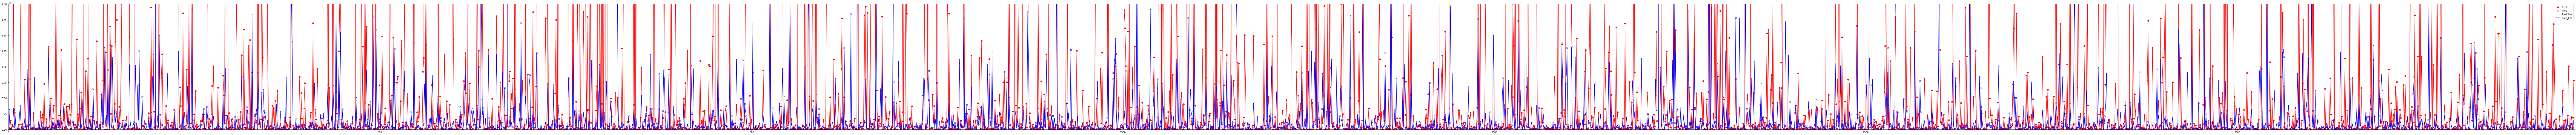

In [40]:
_data_len = len(pred_y)
plt.figure(figsize=(200,10))

plot_list = [idx for idx in range(_data_len) 
             if abs(_y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 1e+6*2 or True]


data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(_y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(_y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 0.2*1e8#max(pred_y.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()

In [41]:
diff_list = abs(_y_test.cpu().detach().numpy() - pred_y.cpu().detach().numpy())
diff_list = np.sort(diff_list)

q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

iqr = q3 - q1
outlier = 1.5*iqr

r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])

r.mean()

777977.2

In [42]:
y_t = _y_test.cpu().detach().numpy()
y_p = pred_y.cpu().detach().numpy()

In [43]:
# t-test

import scipy.stats

scipy.stats.ttest_ind(y_t, y_p, equal_var=False)

Ttest_indResult(statistic=array([2.879868], dtype=float32), pvalue=array([0.00400289]))

In [44]:
y_t

array([[ 490101.],
       [ 242671.],
       [  46000.],
       ...,
       [  15618.],
       [1882370.],
       [7828078.]], dtype=float32)

In [45]:
y_p

array([[  79596.43],
       [3236860.2 ],
       [ 147291.28],
       ...,
       [ 176137.92],
       [ 243758.66],
       [1481184.8 ]], dtype=float32)

In [46]:
torch.save(deepmodel.state_dict(), './NewModel_0223.pth')
# deepmodel = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
# deepmodel.load_state_dict(torch.load(path+"LSTM.pth"))

In [101]:
1e7

10000000.0

In [52]:
df.iloc[:,-1].mean()

20277036.671144824

In [31]:
# LSTM
deepmodel = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-3)

num_epochs = 300
total_step = len(dataloader) # 배치 개수
for epoch in range(num_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        x_train = x_train.reshape(-1, 1, input_size)

       # 순전파
        pred = deepmodel(x_train)
        y_train = torch.log(y_train)
        y_train = y_train.reshape(-1,1)
        
#         print(pred)        
#         pred = torch.clamp(pred, min=1e-5)
        pred = torch.log(pred)
        pred = pred.reshape(-1,1)
#         print(pred)
#         import sys
#         sys.exit()
        
        
        
        
        loss = F.mse_loss(y_train, pred)

        # 역전파 & 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_idx+1) % 100 == 0: 
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                epoch+1, num_epochs, batch_idx+1, total_step, loss.item()))



Epoch [1/300], Step [100/108], Loss: 106.7651
Epoch [2/300], Step [100/108], Loss: 92.8297
Epoch [3/300], Step [100/108], Loss: 87.4949
Epoch [4/300], Step [100/108], Loss: 81.4156
Epoch [5/300], Step [100/108], Loss: 82.4413
Epoch [6/300], Step [100/108], Loss: 73.5806
Epoch [7/300], Step [100/108], Loss: 81.6713
Epoch [8/300], Step [100/108], Loss: 71.0538
Epoch [9/300], Step [100/108], Loss: 71.5686
Epoch [10/300], Step [100/108], Loss: 69.7994
Epoch [11/300], Step [100/108], Loss: 65.5771
Epoch [12/300], Step [100/108], Loss: 62.7389
Epoch [13/300], Step [100/108], Loss: 69.0502
Epoch [14/300], Step [100/108], Loss: 64.8941
Epoch [15/300], Step [100/108], Loss: 64.3879
Epoch [16/300], Step [100/108], Loss: 62.7402
Epoch [17/300], Step [100/108], Loss: 59.9220
Epoch [18/300], Step [100/108], Loss: 65.3528
Epoch [19/300], Step [100/108], Loss: 71.1814
Epoch [20/300], Step [100/108], Loss: 60.1473
Epoch [21/300], Step [100/108], Loss: 61.6162
Epoch [22/300], Step [100/108], Loss: 61.4

Epoch [178/300], Step [100/108], Loss: 29.4899
Epoch [179/300], Step [100/108], Loss: 31.4157
Epoch [180/300], Step [100/108], Loss: 27.7100
Epoch [181/300], Step [100/108], Loss: 27.7430
Epoch [182/300], Step [100/108], Loss: 27.6262
Epoch [183/300], Step [100/108], Loss: 27.3314
Epoch [184/300], Step [100/108], Loss: 24.2666
Epoch [185/300], Step [100/108], Loss: 29.7760
Epoch [186/300], Step [100/108], Loss: 24.0304
Epoch [187/300], Step [100/108], Loss: 26.8553
Epoch [188/300], Step [100/108], Loss: 31.8288
Epoch [189/300], Step [100/108], Loss: 24.2123
Epoch [190/300], Step [100/108], Loss: 28.0875
Epoch [191/300], Step [100/108], Loss: 28.1672
Epoch [192/300], Step [100/108], Loss: 27.0324
Epoch [193/300], Step [100/108], Loss: 24.9382
Epoch [194/300], Step [100/108], Loss: 27.1368
Epoch [195/300], Step [100/108], Loss: 23.9298
Epoch [196/300], Step [100/108], Loss: 24.0277
Epoch [197/300], Step [100/108], Loss: 24.8549
Epoch [198/300], Step [100/108], Loss: 24.5806
Epoch [199/30

In [24]:
#torch.save(deepmodel.state_dict(), './LSTM.pth')
# deepmodel = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
# deepmodel.load_state_dict(torch.load(path+"LSTM.pth"))

In [25]:
x_test = x_test.reshape(-1, 1, input_size)

In [26]:
pred_y = deepmodel(x_test)

In [27]:
torch.mean(torch.abs(pred_y - y_test))

tensor(16859890., device='cuda:0', grad_fn=<MeanBackward0>)

In [28]:
torch.min(pred_y)

tensor(9250.2988, device='cuda:0', grad_fn=<MinBackward1>)

In [29]:
torch.max(pred_y)

tensor(9250.2988, device='cuda:0', grad_fn=<MaxBackward1>)

In [153]:
# L2 Loss
deepmodel = DeepModel(x_train.shape[1], 1).to(device)
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)
# optimizer = torch.optim.SGD(deepmodel.parameters(), lr=1e-3, momentum=0.9)


n_epochs = 50
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples

        pred = deepmodel(x_train).to(device)
        cost = F.mse_loss(y_train, pred)
        loss_list.append(cost)
        with torch.no_grad():
            pred_y = deepmodel(x_test)
            test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
            
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

<ipython-input-153-48bb24a0e261>:15: UserWarning: Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  cost = F.mse_loss(y_train, pred)


Ep 0/50  Batch 1/108  cost : 108.59271240234375
Ep 0/50  Batch 2/108  cost : 699.1537475585938
Ep 0/50  Batch 3/108  cost : 130.0137481689453
Ep 0/50  Batch 4/108  cost : 51.78192901611328
Ep 0/50  Batch 5/108  cost : 183.24424743652344
Ep 0/50  Batch 6/108  cost : 97.8344955444336
Ep 0/50  Batch 7/108  cost : 93.15016174316406
Ep 0/50  Batch 8/108  cost : 258.7442321777344
Ep 0/50  Batch 9/108  cost : 73.71080017089844
Ep 0/50  Batch 10/108  cost : 134.0092315673828
Ep 0/50  Batch 11/108  cost : 297.5070495605469
Ep 0/50  Batch 12/108  cost : 3802.671875
Ep 0/50  Batch 13/108  cost : 88239.6875
Ep 0/50  Batch 14/108  cost : 168.22691345214844
Ep 0/50  Batch 15/108  cost : 99.94017028808594
Ep 0/50  Batch 16/108  cost : 299.2647399902344
Ep 0/50  Batch 17/108  cost : 212.4354248046875
Ep 0/50  Batch 18/108  cost : 1483.85888671875
Ep 0/50  Batch 19/108  cost : 158.64906311035156
Ep 0/50  Batch 20/108  cost : 319.392578125
Ep 0/50  Batch 21/108  cost : 151.29672241210938
Ep 0/50  Batch 

<ipython-input-153-48bb24a0e261>:15: UserWarning: Using a target size (torch.Size([119, 1])) that is different to the input size (torch.Size([119])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  cost = F.mse_loss(y_train, pred)


Ep 1/50  Batch 22/108  cost : 120.96142578125
Ep 1/50  Batch 23/108  cost : 2971.60546875
Ep 1/50  Batch 24/108  cost : 47182.40234375
Ep 1/50  Batch 25/108  cost : 267.7120361328125
Ep 1/50  Batch 26/108  cost : 933.6865844726562
Ep 1/50  Batch 27/108  cost : 111.14883422851562
Ep 1/50  Batch 28/108  cost : 131.25912475585938
Ep 1/50  Batch 29/108  cost : 166.19822692871094
Ep 1/50  Batch 30/108  cost : 130.1951446533203
Ep 1/50  Batch 31/108  cost : 55.932701110839844
Ep 1/50  Batch 32/108  cost : 81.23041534423828
Ep 1/50  Batch 33/108  cost : 392.519775390625
Ep 1/50  Batch 34/108  cost : 9630.6083984375
Ep 1/50  Batch 35/108  cost : 295.730224609375
Ep 1/50  Batch 36/108  cost : 152.5557098388672
Ep 1/50  Batch 37/108  cost : 82.07550048828125
Ep 1/50  Batch 38/108  cost : 95.25888061523438
Ep 1/50  Batch 39/108  cost : 143.81411743164062
Ep 1/50  Batch 40/108  cost : 179.9133758544922
Ep 1/50  Batch 41/108  cost : 116.310546875
Ep 1/50  Batch 42/108  cost : 77.4351577758789
Ep 1/

Ep 3/50  Batch 1/108  cost : 118.15528869628906
Ep 3/50  Batch 2/108  cost : 76.6752700805664
Ep 3/50  Batch 3/108  cost : 177.441650390625
Ep 3/50  Batch 4/108  cost : 1049.7467041015625
Ep 3/50  Batch 5/108  cost : 338.8915710449219
Ep 3/50  Batch 6/108  cost : 608.7749633789062
Ep 3/50  Batch 7/108  cost : 58.664527893066406
Ep 3/50  Batch 8/108  cost : 20.61775016784668
Ep 3/50  Batch 9/108  cost : 91.95869445800781
Ep 3/50  Batch 10/108  cost : 119.24504089355469
Ep 3/50  Batch 11/108  cost : 150.67324829101562
Ep 3/50  Batch 12/108  cost : 300.826416015625
Ep 3/50  Batch 13/108  cost : 72.8648681640625
Ep 3/50  Batch 14/108  cost : 51.778011322021484
Ep 3/50  Batch 15/108  cost : 275.0643310546875
Ep 3/50  Batch 16/108  cost : 87.59071350097656
Ep 3/50  Batch 17/108  cost : 135.6277313232422
Ep 3/50  Batch 18/108  cost : 108.68018341064453
Ep 3/50  Batch 19/108  cost : 133.985107421875
Ep 3/50  Batch 20/108  cost : 60.22993469238281
Ep 3/50  Batch 21/108  cost : 56.36158752441406

Ep 4/50  Batch 89/108  cost : 40.59632110595703
Ep 4/50  Batch 90/108  cost : 134.12261962890625
Ep 4/50  Batch 91/108  cost : 86491.4765625
Ep 4/50  Batch 92/108  cost : 119.40729522705078
Ep 4/50  Batch 93/108  cost : 67.4778823852539
Ep 4/50  Batch 94/108  cost : 7877.8916015625
Ep 4/50  Batch 95/108  cost : 135.19935607910156
Ep 4/50  Batch 96/108  cost : 130.75360107421875
Ep 4/50  Batch 97/108  cost : 137.58673095703125
Ep 4/50  Batch 98/108  cost : 292.9466552734375
Ep 4/50  Batch 99/108  cost : 69.13821411132812
Ep 4/50  Batch 100/108  cost : 64.16276550292969
Ep 4/50  Batch 101/108  cost : 2541.57373046875
Ep 4/50  Batch 102/108  cost : 83.55794525146484
Ep 4/50  Batch 103/108  cost : 35.134788513183594
Ep 4/50  Batch 104/108  cost : 100.1744384765625
Ep 4/50  Batch 105/108  cost : 966.644287109375
Ep 4/50  Batch 106/108  cost : 95.09410095214844
Ep 4/50  Batch 107/108  cost : 37.092369079589844
Ep 4/50  Batch 108/108  cost : 87.09212493896484
Ep 5/50  Batch 1/108  cost : 102.

Ep 6/50  Batch 68/108  cost : 35.934417724609375
Ep 6/50  Batch 69/108  cost : 389.25177001953125
Ep 6/50  Batch 70/108  cost : 94.74774932861328
Ep 6/50  Batch 71/108  cost : 58.00873565673828
Ep 6/50  Batch 72/108  cost : 394.1434020996094
Ep 6/50  Batch 73/108  cost : 270.9218444824219
Ep 6/50  Batch 74/108  cost : 95.07228088378906
Ep 6/50  Batch 75/108  cost : 55.123130798339844
Ep 6/50  Batch 76/108  cost : 59.509986877441406
Ep 6/50  Batch 77/108  cost : 118.73283386230469
Ep 6/50  Batch 78/108  cost : 125.99819946289062
Ep 6/50  Batch 79/108  cost : 179.48703002929688
Ep 6/50  Batch 80/108  cost : 190.67556762695312
Ep 6/50  Batch 81/108  cost : 1008.3546142578125
Ep 6/50  Batch 82/108  cost : 244.6697235107422
Ep 6/50  Batch 83/108  cost : 994.1116943359375
Ep 6/50  Batch 84/108  cost : 181.09376525878906
Ep 6/50  Batch 85/108  cost : 165.79302978515625
Ep 6/50  Batch 86/108  cost : 178.9478759765625
Ep 6/50  Batch 87/108  cost : 1165.1292724609375
Ep 6/50  Batch 88/108  cost 

Ep 8/50  Batch 47/108  cost : 81.10334014892578
Ep 8/50  Batch 48/108  cost : 86356.4296875
Ep 8/50  Batch 49/108  cost : 157.44769287109375
Ep 8/50  Batch 50/108  cost : 754.0328979492188
Ep 8/50  Batch 51/108  cost : 89.9302978515625
Ep 8/50  Batch 52/108  cost : 107.52751159667969
Ep 8/50  Batch 53/108  cost : 221.36016845703125
Ep 8/50  Batch 54/108  cost : 92.77896881103516
Ep 8/50  Batch 55/108  cost : 151.1754913330078
Ep 8/50  Batch 56/108  cost : 83.19385528564453
Ep 8/50  Batch 57/108  cost : 40.53440856933594
Ep 8/50  Batch 58/108  cost : 48.949951171875
Ep 8/50  Batch 59/108  cost : 82.02874755859375
Ep 8/50  Batch 60/108  cost : 90.5779037475586
Ep 8/50  Batch 61/108  cost : 890.0036010742188
Ep 8/50  Batch 62/108  cost : 42.01337432861328
Ep 8/50  Batch 63/108  cost : 958.2723999023438
Ep 8/50  Batch 64/108  cost : 544.2715454101562
Ep 8/50  Batch 65/108  cost : 187.5479736328125
Ep 8/50  Batch 66/108  cost : 166.1946563720703
Ep 8/50  Batch 67/108  cost : 154.06900024414

Ep 10/50  Batch 26/108  cost : 59.84651565551758
Ep 10/50  Batch 27/108  cost : 1003.6683959960938
Ep 10/50  Batch 28/108  cost : 75.94283294677734
Ep 10/50  Batch 29/108  cost : 7536.91259765625
Ep 10/50  Batch 30/108  cost : 153.88824462890625
Ep 10/50  Batch 31/108  cost : 337.83502197265625
Ep 10/50  Batch 32/108  cost : 114.95536804199219
Ep 10/50  Batch 33/108  cost : 165.8589630126953
Ep 10/50  Batch 34/108  cost : 46.85609817504883
Ep 10/50  Batch 35/108  cost : 159.14749145507812
Ep 10/50  Batch 36/108  cost : 101.38616943359375
Ep 10/50  Batch 37/108  cost : 893.1674194335938
Ep 10/50  Batch 38/108  cost : 75.75111389160156
Ep 10/50  Batch 39/108  cost : 69.25603485107422
Ep 10/50  Batch 40/108  cost : 72.87864685058594
Ep 10/50  Batch 41/108  cost : 109.0757827758789
Ep 10/50  Batch 42/108  cost : 76.56343841552734
Ep 10/50  Batch 43/108  cost : 2838.002197265625
Ep 10/50  Batch 44/108  cost : 1183.8095703125
Ep 10/50  Batch 45/108  cost : 83.26636505126953
Ep 10/50  Batch 4

Ep 12/50  Batch 7/108  cost : 333.6248779296875
Ep 12/50  Batch 8/108  cost : 108.23374938964844
Ep 12/50  Batch 9/108  cost : 974.7342529296875
Ep 12/50  Batch 10/108  cost : 123.06573486328125
Ep 12/50  Batch 11/108  cost : 128.3646240234375
Ep 12/50  Batch 12/108  cost : 757.004638671875
Ep 12/50  Batch 13/108  cost : 47068.38671875
Ep 12/50  Batch 14/108  cost : 120.3909912109375
Ep 12/50  Batch 15/108  cost : 90.29920959472656
Ep 12/50  Batch 16/108  cost : 81.73828887939453
Ep 12/50  Batch 17/108  cost : 1280.50390625
Ep 12/50  Batch 18/108  cost : 206.0780487060547
Ep 12/50  Batch 19/108  cost : 85.7478256225586
Ep 12/50  Batch 20/108  cost : 86321.53125
Ep 12/50  Batch 21/108  cost : 442.57891845703125
Ep 12/50  Batch 22/108  cost : 2713.033447265625
Ep 12/50  Batch 23/108  cost : 74.19747924804688
Ep 12/50  Batch 24/108  cost : 70.70329284667969
Ep 12/50  Batch 25/108  cost : 34.36151885986328
Ep 12/50  Batch 26/108  cost : 34.483551025390625
Ep 12/50  Batch 27/108  cost : 123

Ep 13/50  Batch 97/108  cost : 220.29025268554688
Ep 13/50  Batch 98/108  cost : 286.10125732421875
Ep 13/50  Batch 99/108  cost : 2692.799560546875
Ep 13/50  Batch 100/108  cost : 112.72482299804688
Ep 13/50  Batch 101/108  cost : 58.218505859375
Ep 13/50  Batch 102/108  cost : 86.2269287109375
Ep 13/50  Batch 103/108  cost : 301.9571838378906
Ep 13/50  Batch 104/108  cost : 137.8161163330078
Ep 13/50  Batch 105/108  cost : 57.664825439453125
Ep 13/50  Batch 106/108  cost : 81.56143951416016
Ep 13/50  Batch 107/108  cost : 47168.75
Ep 13/50  Batch 108/108  cost : 71.49144744873047
Ep 14/50  Batch 1/108  cost : 621.6336669921875
Ep 14/50  Batch 2/108  cost : 183.12057495117188
Ep 14/50  Batch 3/108  cost : 55.113990783691406
Ep 14/50  Batch 4/108  cost : 64.64994812011719
Ep 14/50  Batch 5/108  cost : 297.07806396484375
Ep 14/50  Batch 6/108  cost : 391.897705078125
Ep 14/50  Batch 7/108  cost : 116.37722778320312
Ep 14/50  Batch 8/108  cost : 134.17410278320312
Ep 14/50  Batch 9/108  

Ep 15/50  Batch 77/108  cost : 284.9757080078125
Ep 15/50  Batch 78/108  cost : 191.77761840820312
Ep 15/50  Batch 79/108  cost : 224.17111206054688
Ep 15/50  Batch 80/108  cost : 1052.34326171875
Ep 15/50  Batch 81/108  cost : 84.042236328125
Ep 15/50  Batch 82/108  cost : 200.90989685058594
Ep 15/50  Batch 83/108  cost : 45.71696472167969
Ep 15/50  Batch 84/108  cost : 86.62361145019531
Ep 15/50  Batch 85/108  cost : 95.21846771240234
Ep 15/50  Batch 86/108  cost : 938.9972534179688
Ep 15/50  Batch 87/108  cost : 117.38519287109375
Ep 15/50  Batch 88/108  cost : 114.02409362792969
Ep 15/50  Batch 89/108  cost : 92.42643737792969
Ep 15/50  Batch 90/108  cost : 61.8900146484375
Ep 15/50  Batch 91/108  cost : 193.13592529296875
Ep 15/50  Batch 92/108  cost : 81.96501159667969
Ep 15/50  Batch 93/108  cost : 72.4429931640625
Ep 15/50  Batch 94/108  cost : 89.04957580566406
Ep 15/50  Batch 95/108  cost : 63.48358917236328
Ep 15/50  Batch 96/108  cost : 29.161640167236328
Ep 15/50  Batch 97

Ep 17/50  Batch 59/108  cost : 30.559738159179688
Ep 17/50  Batch 60/108  cost : 64.69648742675781
Ep 17/50  Batch 61/108  cost : 43.87004852294922
Ep 17/50  Batch 62/108  cost : 1020.2080078125
Ep 17/50  Batch 63/108  cost : 97.34423828125
Ep 17/50  Batch 64/108  cost : 137.31797790527344
Ep 17/50  Batch 65/108  cost : 41.94704818725586
Ep 17/50  Batch 66/108  cost : 257.93939208984375
Ep 17/50  Batch 67/108  cost : 59.236122131347656
Ep 17/50  Batch 68/108  cost : 77.35346221923828
Ep 17/50  Batch 69/108  cost : 57.339256286621094
Ep 17/50  Batch 70/108  cost : 2698.51220703125
Ep 17/50  Batch 71/108  cost : 180.00341796875
Ep 17/50  Batch 72/108  cost : 36.58346939086914
Ep 17/50  Batch 73/108  cost : 64.17271423339844
Ep 17/50  Batch 74/108  cost : 1022.169189453125
Ep 17/50  Batch 75/108  cost : 72.88047790527344
Ep 17/50  Batch 76/108  cost : 1768.97607421875
Ep 17/50  Batch 77/108  cost : 137.3538818359375
Ep 17/50  Batch 78/108  cost : 105.71359252929688
Ep 17/50  Batch 79/108 

Ep 19/50  Batch 41/108  cost : 303.27935791015625
Ep 19/50  Batch 42/108  cost : 289.1988525390625
Ep 19/50  Batch 43/108  cost : 238.96768188476562
Ep 19/50  Batch 44/108  cost : 83.05331420898438
Ep 19/50  Batch 45/108  cost : 171.66061401367188
Ep 19/50  Batch 46/108  cost : 975.5958251953125
Ep 19/50  Batch 47/108  cost : 172.29733276367188
Ep 19/50  Batch 48/108  cost : 268.73187255859375
Ep 19/50  Batch 49/108  cost : 105.0177001953125
Ep 19/50  Batch 50/108  cost : 116.47613525390625
Ep 19/50  Batch 51/108  cost : 552.3460083007812
Ep 19/50  Batch 52/108  cost : 50.64691162109375
Ep 19/50  Batch 53/108  cost : 156.95101928710938
Ep 19/50  Batch 54/108  cost : 230.17762756347656
Ep 19/50  Batch 55/108  cost : 143.7009735107422
Ep 19/50  Batch 56/108  cost : 267.842041015625
Ep 19/50  Batch 57/108  cost : 47.25110626220703
Ep 19/50  Batch 58/108  cost : 451.19647216796875
Ep 19/50  Batch 59/108  cost : 45.35188293457031
Ep 19/50  Batch 60/108  cost : 50.90000534057617
Ep 19/50  Ba

Ep 21/50  Batch 23/108  cost : 111.49668884277344
Ep 21/50  Batch 24/108  cost : 100.82656860351562
Ep 21/50  Batch 25/108  cost : 39.17864227294922
Ep 21/50  Batch 26/108  cost : 205.79222106933594
Ep 21/50  Batch 27/108  cost : 52.712223052978516
Ep 21/50  Batch 28/108  cost : 269.4840087890625
Ep 21/50  Batch 29/108  cost : 40.574005126953125
Ep 21/50  Batch 30/108  cost : 91.02685546875
Ep 21/50  Batch 31/108  cost : 61.87939453125
Ep 21/50  Batch 32/108  cost : 147.51702880859375
Ep 21/50  Batch 33/108  cost : 199.5068359375
Ep 21/50  Batch 34/108  cost : 122.40728759765625
Ep 21/50  Batch 35/108  cost : 882.0479736328125
Ep 21/50  Batch 36/108  cost : 73.46554565429688
Ep 21/50  Batch 37/108  cost : 47.156131744384766
Ep 21/50  Batch 38/108  cost : 91.63920593261719
Ep 21/50  Batch 39/108  cost : 61.95679473876953
Ep 21/50  Batch 40/108  cost : 327.5458984375
Ep 21/50  Batch 41/108  cost : 151.30926513671875
Ep 21/50  Batch 42/108  cost : 2087.96630859375
Ep 21/50  Batch 43/108  

Ep 23/50  Batch 4/108  cost : 930.5221557617188
Ep 23/50  Batch 5/108  cost : 45.17544937133789
Ep 23/50  Batch 6/108  cost : 424.44232177734375
Ep 23/50  Batch 7/108  cost : 131.72549438476562
Ep 23/50  Batch 8/108  cost : 49832.19140625
Ep 23/50  Batch 9/108  cost : 9596.861328125
Ep 23/50  Batch 10/108  cost : 61.10969543457031
Ep 23/50  Batch 11/108  cost : 64.20016479492188
Ep 23/50  Batch 12/108  cost : 7961.9794921875
Ep 23/50  Batch 13/108  cost : 86567.5625
Ep 23/50  Batch 14/108  cost : 103.96511840820312
Ep 23/50  Batch 15/108  cost : 73.37378692626953
Ep 23/50  Batch 16/108  cost : 161.75938415527344
Ep 23/50  Batch 17/108  cost : 46.33695983886719
Ep 23/50  Batch 18/108  cost : 140.9443817138672
Ep 23/50  Batch 19/108  cost : 354.57769775390625
Ep 23/50  Batch 20/108  cost : 70.87808227539062
Ep 23/50  Batch 21/108  cost : 89.35530090332031
Ep 23/50  Batch 22/108  cost : 205.45635986328125
Ep 23/50  Batch 23/108  cost : 2550.1005859375
Ep 23/50  Batch 24/108  cost : 81.917

Ep 24/50  Batch 94/108  cost : 81.81430053710938
Ep 24/50  Batch 95/108  cost : 71.05574035644531
Ep 24/50  Batch 96/108  cost : 68.13558197021484
Ep 24/50  Batch 97/108  cost : 131.1498260498047
Ep 24/50  Batch 98/108  cost : 186.24432373046875
Ep 24/50  Batch 99/108  cost : 77.64808654785156
Ep 24/50  Batch 100/108  cost : 35.87111282348633
Ep 24/50  Batch 101/108  cost : 59.37270736694336
Ep 24/50  Batch 102/108  cost : 125.97776794433594
Ep 24/50  Batch 103/108  cost : 907.5728149414062
Ep 24/50  Batch 104/108  cost : 89.76704406738281
Ep 24/50  Batch 105/108  cost : 47139.19921875
Ep 24/50  Batch 106/108  cost : 443.7634582519531
Ep 24/50  Batch 107/108  cost : 71.13960266113281
Ep 24/50  Batch 108/108  cost : 34.637882232666016
Ep 25/50  Batch 1/108  cost : 558.9705810546875
Ep 25/50  Batch 2/108  cost : 55.87451934814453
Ep 25/50  Batch 3/108  cost : 186.22427368164062
Ep 25/50  Batch 4/108  cost : 89.77949523925781
Ep 25/50  Batch 5/108  cost : 999.9911499023438
Ep 25/50  Batch

Ep 26/50  Batch 76/108  cost : 630.495849609375
Ep 26/50  Batch 77/108  cost : 43.23777770996094
Ep 26/50  Batch 78/108  cost : 189.42010498046875
Ep 26/50  Batch 79/108  cost : 180.22552490234375
Ep 26/50  Batch 80/108  cost : 85.14763641357422
Ep 26/50  Batch 81/108  cost : 86.10891723632812
Ep 26/50  Batch 82/108  cost : 91.83058166503906
Ep 26/50  Batch 83/108  cost : 38.63294982910156
Ep 26/50  Batch 84/108  cost : 81.12879180908203
Ep 26/50  Batch 85/108  cost : 56.36519241333008
Ep 26/50  Batch 86/108  cost : 131.6585693359375
Ep 26/50  Batch 87/108  cost : 50.39394760131836
Ep 26/50  Batch 88/108  cost : 115.53616333007812
Ep 26/50  Batch 89/108  cost : 104.01795959472656
Ep 26/50  Batch 90/108  cost : 987.73681640625
Ep 26/50  Batch 91/108  cost : 630.473876953125
Ep 26/50  Batch 92/108  cost : 162.9178009033203
Ep 26/50  Batch 93/108  cost : 120.82308959960938
Ep 26/50  Batch 94/108  cost : 100.90357971191406
Ep 26/50  Batch 95/108  cost : 109.61323547363281
Ep 26/50  Batch 9

Ep 28/50  Batch 58/108  cost : 914.405029296875
Ep 28/50  Batch 59/108  cost : 973.8850708007812
Ep 28/50  Batch 60/108  cost : 48.00884246826172
Ep 28/50  Batch 61/108  cost : 103.4805908203125
Ep 28/50  Batch 62/108  cost : 122.4958724975586
Ep 28/50  Batch 63/108  cost : 367.2010192871094
Ep 28/50  Batch 64/108  cost : 57.69113540649414
Ep 28/50  Batch 65/108  cost : 73.96855163574219
Ep 28/50  Batch 66/108  cost : 60.542640686035156
Ep 28/50  Batch 67/108  cost : 63.5247802734375
Ep 28/50  Batch 68/108  cost : 185.2188720703125
Ep 28/50  Batch 69/108  cost : 192.86050415039062
Ep 28/50  Batch 70/108  cost : 80.58039855957031
Ep 28/50  Batch 71/108  cost : 317.57940673828125
Ep 28/50  Batch 72/108  cost : 78.26837158203125
Ep 28/50  Batch 73/108  cost : 698.1739501953125
Ep 28/50  Batch 74/108  cost : 1138.896240234375
Ep 28/50  Batch 75/108  cost : 64.3326644897461
Ep 28/50  Batch 76/108  cost : 144.8421630859375
Ep 28/50  Batch 77/108  cost : 82.94210815429688
Ep 28/50  Batch 78/1

Ep 30/50  Batch 40/108  cost : 86430.2578125
Ep 30/50  Batch 41/108  cost : 174.1514129638672
Ep 30/50  Batch 42/108  cost : 78.81562042236328
Ep 30/50  Batch 43/108  cost : 58.214927673339844
Ep 30/50  Batch 44/108  cost : 139.05825805664062
Ep 30/50  Batch 45/108  cost : 945.0057373046875
Ep 30/50  Batch 46/108  cost : 33.75300598144531
Ep 30/50  Batch 47/108  cost : 660.5993041992188
Ep 30/50  Batch 48/108  cost : 234.3720245361328
Ep 30/50  Batch 49/108  cost : 7472.02978515625
Ep 30/50  Batch 50/108  cost : 918.5161743164062
Ep 30/50  Batch 51/108  cost : 269.2083740234375
Ep 30/50  Batch 52/108  cost : 94.27989196777344
Ep 30/50  Batch 53/108  cost : 1034.0888671875
Ep 30/50  Batch 54/108  cost : 151.01487731933594
Ep 30/50  Batch 55/108  cost : 875.492919921875
Ep 30/50  Batch 56/108  cost : 78.15528869628906
Ep 30/50  Batch 57/108  cost : 140.8034210205078
Ep 30/50  Batch 58/108  cost : 131.64773559570312
Ep 30/50  Batch 59/108  cost : 345.33294677734375
Ep 30/50  Batch 60/108 

Ep 32/50  Batch 22/108  cost : 60.94679641723633
Ep 32/50  Batch 23/108  cost : 47.939388275146484
Ep 32/50  Batch 24/108  cost : 2584.721435546875
Ep 32/50  Batch 25/108  cost : 30.804487228393555
Ep 32/50  Batch 26/108  cost : 2685.66357421875
Ep 32/50  Batch 27/108  cost : 928.181640625
Ep 32/50  Batch 28/108  cost : 157.9174346923828
Ep 32/50  Batch 29/108  cost : 75.57422637939453
Ep 32/50  Batch 30/108  cost : 123.64165496826172
Ep 32/50  Batch 31/108  cost : 346.5424499511719
Ep 32/50  Batch 32/108  cost : 149.36557006835938
Ep 32/50  Batch 33/108  cost : 65.15809631347656
Ep 32/50  Batch 34/108  cost : 344.2342529296875
Ep 32/50  Batch 35/108  cost : 153.56951904296875
Ep 32/50  Batch 36/108  cost : 128.24713134765625
Ep 32/50  Batch 37/108  cost : 91.84187316894531
Ep 32/50  Batch 38/108  cost : 103.59370422363281
Ep 32/50  Batch 39/108  cost : 231.5757598876953
Ep 32/50  Batch 40/108  cost : 94.86293029785156
Ep 32/50  Batch 41/108  cost : 101.76838684082031
Ep 32/50  Batch 4

Ep 33/50  Batch 102/108  cost : 74.07951354980469
Ep 33/50  Batch 103/108  cost : 91.28446960449219
Ep 33/50  Batch 104/108  cost : 161.65182495117188
Ep 33/50  Batch 105/108  cost : 274.02728271484375
Ep 33/50  Batch 106/108  cost : 222.1626434326172
Ep 33/50  Batch 107/108  cost : 108.00855255126953
Ep 33/50  Batch 108/108  cost : 55.27286148071289
Ep 34/50  Batch 1/108  cost : 525.9231567382812
Ep 34/50  Batch 2/108  cost : 129.86483764648438
Ep 34/50  Batch 3/108  cost : 172.09861755371094
Ep 34/50  Batch 4/108  cost : 1032.8560791015625
Ep 34/50  Batch 5/108  cost : 54.42002868652344
Ep 34/50  Batch 6/108  cost : 2118.4384765625
Ep 34/50  Batch 7/108  cost : 90.09175872802734
Ep 34/50  Batch 8/108  cost : 53.0085334777832
Ep 34/50  Batch 9/108  cost : 210.27183532714844
Ep 34/50  Batch 10/108  cost : 47796.1328125
Ep 34/50  Batch 11/108  cost : 62.778160095214844
Ep 34/50  Batch 12/108  cost : 68.22486114501953
Ep 34/50  Batch 13/108  cost : 116.5321044921875
Ep 34/50  Batch 14/10

Ep 35/50  Batch 83/108  cost : 918.5192260742188
Ep 35/50  Batch 84/108  cost : 1218.240966796875
Ep 35/50  Batch 85/108  cost : 46972.71875
Ep 35/50  Batch 86/108  cost : 53.33648681640625
Ep 35/50  Batch 87/108  cost : 171.06410217285156
Ep 35/50  Batch 88/108  cost : 963.5269775390625
Ep 35/50  Batch 89/108  cost : 182.6104736328125
Ep 35/50  Batch 90/108  cost : 223.82101440429688
Ep 35/50  Batch 91/108  cost : 55.004913330078125
Ep 35/50  Batch 92/108  cost : 64.43009185791016
Ep 35/50  Batch 93/108  cost : 46.426673889160156
Ep 35/50  Batch 94/108  cost : 34.59203338623047
Ep 35/50  Batch 95/108  cost : 2945.006591796875
Ep 35/50  Batch 96/108  cost : 34.144161224365234
Ep 35/50  Batch 97/108  cost : 97.30033111572266
Ep 35/50  Batch 98/108  cost : 85.1228256225586
Ep 35/50  Batch 99/108  cost : 904.8880004882812
Ep 35/50  Batch 100/108  cost : 60.70970916748047
Ep 35/50  Batch 101/108  cost : 608.719970703125
Ep 35/50  Batch 102/108  cost : 67.60647583007812
Ep 35/50  Batch 103/

Ep 37/50  Batch 64/108  cost : 31.10479736328125
Ep 37/50  Batch 65/108  cost : 373.6948547363281
Ep 37/50  Batch 66/108  cost : 148.6503143310547
Ep 37/50  Batch 67/108  cost : 883.2503662109375
Ep 37/50  Batch 68/108  cost : 256.7013854980469
Ep 37/50  Batch 69/108  cost : 2776.48486328125
Ep 37/50  Batch 70/108  cost : 157.00563049316406
Ep 37/50  Batch 71/108  cost : 91.22351837158203
Ep 37/50  Batch 72/108  cost : 35.07575225830078
Ep 37/50  Batch 73/108  cost : 511.33294677734375
Ep 37/50  Batch 74/108  cost : 71.192138671875
Ep 37/50  Batch 75/108  cost : 214.54452514648438
Ep 37/50  Batch 76/108  cost : 203.57565307617188
Ep 37/50  Batch 77/108  cost : 170.4530029296875
Ep 37/50  Batch 78/108  cost : 139.8465576171875
Ep 37/50  Batch 79/108  cost : 755.8777465820312
Ep 37/50  Batch 80/108  cost : 174.2763214111328
Ep 37/50  Batch 81/108  cost : 42.67530822753906
Ep 37/50  Batch 82/108  cost : 33.866580963134766
Ep 37/50  Batch 83/108  cost : 96.34284973144531
Ep 37/50  Batch 84

Ep 39/50  Batch 46/108  cost : 131.95736694335938
Ep 39/50  Batch 47/108  cost : 75.36434173583984
Ep 39/50  Batch 48/108  cost : 734.0462036132812
Ep 39/50  Batch 49/108  cost : 113.3666763305664
Ep 39/50  Batch 50/108  cost : 766.316162109375
Ep 39/50  Batch 51/108  cost : 121.08374786376953
Ep 39/50  Batch 52/108  cost : 174.6573028564453
Ep 39/50  Batch 53/108  cost : 327.5027770996094
Ep 39/50  Batch 54/108  cost : 110.29127502441406
Ep 39/50  Batch 55/108  cost : 2153.26171875
Ep 39/50  Batch 56/108  cost : 113.641357421875
Ep 39/50  Batch 57/108  cost : 49.652488708496094
Ep 39/50  Batch 58/108  cost : 69.6655044555664
Ep 39/50  Batch 59/108  cost : 135.10838317871094
Ep 39/50  Batch 60/108  cost : 46.08055877685547
Ep 39/50  Batch 61/108  cost : 7541.5341796875
Ep 39/50  Batch 62/108  cost : 224.3009033203125
Ep 39/50  Batch 63/108  cost : 443.482177734375
Ep 39/50  Batch 64/108  cost : 51.34734344482422
Ep 39/50  Batch 65/108  cost : 44.952999114990234
Ep 39/50  Batch 66/108  

Ep 41/50  Batch 28/108  cost : 151.44143676757812
Ep 41/50  Batch 29/108  cost : 358.2345886230469
Ep 41/50  Batch 30/108  cost : 82.95213317871094
Ep 41/50  Batch 31/108  cost : 192.5694122314453
Ep 41/50  Batch 32/108  cost : 106.06294250488281
Ep 41/50  Batch 33/108  cost : 56.14423370361328
Ep 41/50  Batch 34/108  cost : 71.20442199707031
Ep 41/50  Batch 35/108  cost : 273.9981994628906
Ep 41/50  Batch 36/108  cost : 39.327816009521484
Ep 41/50  Batch 37/108  cost : 106.05087280273438
Ep 41/50  Batch 38/108  cost : 93.04443359375
Ep 41/50  Batch 39/108  cost : 63.58017349243164
Ep 41/50  Batch 40/108  cost : 301.3842468261719
Ep 41/50  Batch 41/108  cost : 130.58554077148438
Ep 41/50  Batch 42/108  cost : 29.644859313964844
Ep 41/50  Batch 43/108  cost : 167.88623046875
Ep 41/50  Batch 44/108  cost : 75.984130859375
Ep 41/50  Batch 45/108  cost : 2836.58935546875
Ep 41/50  Batch 46/108  cost : 59.38465881347656
Ep 41/50  Batch 47/108  cost : 1309.4842529296875
Ep 41/50  Batch 48/10

Ep 43/50  Batch 10/108  cost : 46.28425979614258
Ep 43/50  Batch 11/108  cost : 249.18963623046875
Ep 43/50  Batch 12/108  cost : 201.31585693359375
Ep 43/50  Batch 13/108  cost : 119.47695922851562
Ep 43/50  Batch 14/108  cost : 66.56489562988281
Ep 43/50  Batch 15/108  cost : 83.16593933105469
Ep 43/50  Batch 16/108  cost : 107.50148010253906
Ep 43/50  Batch 17/108  cost : 792.3802490234375
Ep 43/50  Batch 18/108  cost : 79.14517211914062
Ep 43/50  Batch 19/108  cost : 211.25621032714844
Ep 43/50  Batch 20/108  cost : 126.23287963867188
Ep 43/50  Batch 21/108  cost : 64.59027862548828
Ep 43/50  Batch 22/108  cost : 348.78692626953125
Ep 43/50  Batch 23/108  cost : 157.45391845703125
Ep 43/50  Batch 24/108  cost : 1756.2677001953125
Ep 43/50  Batch 25/108  cost : 67.51454162597656
Ep 43/50  Batch 26/108  cost : 355.37591552734375
Ep 43/50  Batch 27/108  cost : 2804.6884765625
Ep 43/50  Batch 28/108  cost : 37.73853302001953
Ep 43/50  Batch 29/108  cost : 61.90193176269531
Ep 43/50  Ba

Ep 44/50  Batch 99/108  cost : 227.6353759765625
Ep 44/50  Batch 100/108  cost : 149.65411376953125
Ep 44/50  Batch 101/108  cost : 160.78500366210938
Ep 44/50  Batch 102/108  cost : 155.36203002929688
Ep 44/50  Batch 103/108  cost : 9497.94140625
Ep 44/50  Batch 104/108  cost : 114.20686340332031
Ep 44/50  Batch 105/108  cost : 245.80361938476562
Ep 44/50  Batch 106/108  cost : 95.53971099853516
Ep 44/50  Batch 107/108  cost : 60.670166015625
Ep 44/50  Batch 108/108  cost : 2913.408203125
Ep 45/50  Batch 1/108  cost : 53.38408279418945
Ep 45/50  Batch 2/108  cost : 81.5699462890625
Ep 45/50  Batch 3/108  cost : 659.3817749023438
Ep 45/50  Batch 4/108  cost : 97.50215148925781
Ep 45/50  Batch 5/108  cost : 41.110015869140625
Ep 45/50  Batch 6/108  cost : 97.05170440673828
Ep 45/50  Batch 7/108  cost : 354.9306640625
Ep 45/50  Batch 8/108  cost : 193.04226684570312
Ep 45/50  Batch 9/108  cost : 1079.747314453125
Ep 45/50  Batch 10/108  cost : 46.513187408447266
Ep 45/50  Batch 11/108  c

Ep 46/50  Batch 80/108  cost : 178.1873321533203
Ep 46/50  Batch 81/108  cost : 110.9253158569336
Ep 46/50  Batch 82/108  cost : 2851.156494140625
Ep 46/50  Batch 83/108  cost : 280.38037109375
Ep 46/50  Batch 84/108  cost : 133.58056640625
Ep 46/50  Batch 85/108  cost : 151.51380920410156
Ep 46/50  Batch 86/108  cost : 58.941627502441406
Ep 46/50  Batch 87/108  cost : 112.14918518066406
Ep 46/50  Batch 88/108  cost : 34.382728576660156
Ep 46/50  Batch 89/108  cost : 105.89456176757812
Ep 46/50  Batch 90/108  cost : 1267.773681640625
Ep 46/50  Batch 91/108  cost : 88721.8046875
Ep 46/50  Batch 92/108  cost : 99.10912322998047
Ep 46/50  Batch 93/108  cost : 101.61195373535156
Ep 46/50  Batch 94/108  cost : 34.74110794067383
Ep 46/50  Batch 95/108  cost : 648.1484375
Ep 46/50  Batch 96/108  cost : 231.66415405273438
Ep 46/50  Batch 97/108  cost : 925.3212890625
Ep 46/50  Batch 98/108  cost : 44.95625686645508
Ep 46/50  Batch 99/108  cost : 185.37376403808594
Ep 46/50  Batch 100/108  cost

Ep 48/50  Batch 62/108  cost : 188.6737060546875
Ep 48/50  Batch 63/108  cost : 97.56449890136719
Ep 48/50  Batch 64/108  cost : 116.37506866455078
Ep 48/50  Batch 65/108  cost : 349.5483093261719
Ep 48/50  Batch 66/108  cost : 173.0023651123047
Ep 48/50  Batch 67/108  cost : 73.07431030273438
Ep 48/50  Batch 68/108  cost : 86324.9296875
Ep 48/50  Batch 69/108  cost : 117.72949981689453
Ep 48/50  Batch 70/108  cost : 638.803955078125
Ep 48/50  Batch 71/108  cost : 139.68417358398438
Ep 48/50  Batch 72/108  cost : 1451.5609130859375
Ep 48/50  Batch 73/108  cost : 131.9990234375
Ep 48/50  Batch 74/108  cost : 67.2293472290039
Ep 48/50  Batch 75/108  cost : 90.83253479003906
Ep 48/50  Batch 76/108  cost : 2210.96533203125
Ep 48/50  Batch 77/108  cost : 3648.1943359375
Ep 48/50  Batch 78/108  cost : 51.21813201904297
Ep 48/50  Batch 79/108  cost : 68.99300384521484
Ep 48/50  Batch 80/108  cost : 2894.17431640625
Ep 48/50  Batch 81/108  cost : 126.89257049560547
Ep 48/50  Batch 82/108  cost

In [142]:
# L1 Loss
deepmodel = DeepModel(x_train.shape[1], 1).to(device)
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-3)
# optimizer = torch.optim.SGD(deepmodel.parameters(), lr=1e-3, momentum=0.9)

n_epochs = 50
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples

        pred = deepmodel(x_train).to(device)
        cost = F.l1_loss(y_train, pred)
        loss_list.append(cost)
        with torch.no_grad():
            pred_y = deepmodel(x_test)
            test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

<ipython-input-142-72d94928afad>:14: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  cost = F.l1_loss(y_train, pred)


Ep 0/50  Batch 1/216  cost : 3.4731595516204834
Ep 0/50  Batch 2/216  cost : 3.0335867404937744
Ep 0/50  Batch 3/216  cost : 4.555630683898926
Ep 0/50  Batch 4/216  cost : 3.5516228675842285
Ep 0/50  Batch 5/216  cost : 5.220719337463379
Ep 0/50  Batch 6/216  cost : 5.203629016876221
Ep 0/50  Batch 7/216  cost : 4.429446220397949
Ep 0/50  Batch 8/216  cost : 4.522592067718506
Ep 0/50  Batch 9/216  cost : 5.6764020919799805
Ep 0/50  Batch 10/216  cost : 2.6425135135650635
Ep 0/50  Batch 11/216  cost : 5.967143535614014
Ep 0/50  Batch 12/216  cost : 3.8051533699035645
Ep 0/50  Batch 13/216  cost : 2.9588940143585205
Ep 0/50  Batch 14/216  cost : 12.682680130004883
Ep 0/50  Batch 15/216  cost : 8.098203659057617
Ep 0/50  Batch 16/216  cost : 8.772233963012695
Ep 0/50  Batch 17/216  cost : 4.6893157958984375
Ep 0/50  Batch 18/216  cost : 3.6392602920532227
Ep 0/50  Batch 19/216  cost : 4.386914253234863
Ep 0/50  Batch 20/216  cost : 3.455716133117676
Ep 0/50  Batch 21/216  cost : 3.5346841

<ipython-input-142-72d94928afad>:14: UserWarning: Using a target size (torch.Size([55, 1])) that is different to the input size (torch.Size([55])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  cost = F.l1_loss(y_train, pred)


Ep 1/50  Batch 28/216  cost : 3.43320894241333
Ep 1/50  Batch 29/216  cost : 12.312482833862305
Ep 1/50  Batch 30/216  cost : 3.7657296657562256
Ep 1/50  Batch 31/216  cost : 3.0063493251800537
Ep 1/50  Batch 32/216  cost : 3.1475648880004883
Ep 1/50  Batch 33/216  cost : 5.299206733703613
Ep 1/50  Batch 34/216  cost : 6.046210765838623
Ep 1/50  Batch 35/216  cost : 5.554452896118164
Ep 1/50  Batch 36/216  cost : 3.6701784133911133
Ep 1/50  Batch 37/216  cost : 2.7296719551086426
Ep 1/50  Batch 38/216  cost : 10.610015869140625
Ep 1/50  Batch 39/216  cost : 4.30085563659668
Ep 1/50  Batch 40/216  cost : 4.220126152038574
Ep 1/50  Batch 41/216  cost : 4.047435283660889
Ep 1/50  Batch 42/216  cost : 3.3385095596313477
Ep 1/50  Batch 43/216  cost : 4.944662094116211
Ep 1/50  Batch 44/216  cost : 5.258312225341797
Ep 1/50  Batch 45/216  cost : 9.924510955810547
Ep 1/50  Batch 46/216  cost : 4.938482284545898
Ep 1/50  Batch 47/216  cost : 3.118729829788208
Ep 1/50  Batch 48/216  cost : 3.05

Ep 2/50  Batch 57/216  cost : 5.234785556793213
Ep 2/50  Batch 58/216  cost : 6.4398417472839355
Ep 2/50  Batch 59/216  cost : 5.570509910583496
Ep 2/50  Batch 60/216  cost : 1.2475612163543701
Ep 2/50  Batch 61/216  cost : 4.0227556228637695
Ep 2/50  Batch 62/216  cost : 3.3679537773132324
Ep 2/50  Batch 63/216  cost : 8.20546817779541
Ep 2/50  Batch 64/216  cost : 6.3495635986328125
Ep 2/50  Batch 65/216  cost : 5.738206386566162
Ep 2/50  Batch 66/216  cost : 3.315276622772217
Ep 2/50  Batch 67/216  cost : 8.718914031982422
Ep 2/50  Batch 68/216  cost : 3.083970069885254
Ep 2/50  Batch 69/216  cost : 6.925024032592773
Ep 2/50  Batch 70/216  cost : 4.193719863891602
Ep 2/50  Batch 71/216  cost : 5.781302452087402
Ep 2/50  Batch 72/216  cost : 6.588529586791992
Ep 2/50  Batch 73/216  cost : 6.114790916442871
Ep 2/50  Batch 74/216  cost : 3.2333927154541016
Ep 2/50  Batch 75/216  cost : 2.9966578483581543
Ep 2/50  Batch 76/216  cost : 56.99630355834961
Ep 2/50  Batch 77/216  cost : 3.52

Ep 3/50  Batch 85/216  cost : 4.915262699127197
Ep 3/50  Batch 86/216  cost : 5.344160556793213
Ep 3/50  Batch 87/216  cost : 6.686948776245117
Ep 3/50  Batch 88/216  cost : 4.626211643218994
Ep 3/50  Batch 89/216  cost : 4.472246170043945
Ep 3/50  Batch 90/216  cost : 4.30743408203125
Ep 3/50  Batch 91/216  cost : 4.4842095375061035
Ep 3/50  Batch 92/216  cost : 2.8676724433898926
Ep 3/50  Batch 93/216  cost : 5.26081657409668
Ep 3/50  Batch 94/216  cost : 2.971303939819336
Ep 3/50  Batch 95/216  cost : 3.1716246604919434
Ep 3/50  Batch 96/216  cost : 4.140192985534668
Ep 3/50  Batch 97/216  cost : 5.3508076667785645
Ep 3/50  Batch 98/216  cost : 5.666100978851318
Ep 3/50  Batch 99/216  cost : 6.155782222747803
Ep 3/50  Batch 100/216  cost : 5.120206832885742
Ep 3/50  Batch 101/216  cost : 8.55587387084961
Ep 3/50  Batch 102/216  cost : 4.809295654296875
Ep 3/50  Batch 103/216  cost : 5.059565544128418
Ep 3/50  Batch 104/216  cost : 2.272946834564209
Ep 3/50  Batch 105/216  cost : 3.3

Ep 4/50  Batch 113/216  cost : 56.726409912109375
Ep 4/50  Batch 114/216  cost : 6.553732872009277
Ep 4/50  Batch 115/216  cost : 3.3751654624938965
Ep 4/50  Batch 116/216  cost : 3.076443910598755
Ep 4/50  Batch 117/216  cost : 4.516430377960205
Ep 4/50  Batch 118/216  cost : 4.868308067321777
Ep 4/50  Batch 119/216  cost : 4.39077091217041
Ep 4/50  Batch 120/216  cost : 3.5727639198303223
Ep 4/50  Batch 121/216  cost : 4.243173599243164
Ep 4/50  Batch 122/216  cost : 4.147225379943848
Ep 4/50  Batch 123/216  cost : 4.702652454376221
Ep 4/50  Batch 124/216  cost : 2.9054408073425293
Ep 4/50  Batch 125/216  cost : 5.147480010986328
Ep 4/50  Batch 126/216  cost : 2.585190534591675
Ep 4/50  Batch 127/216  cost : 4.132290840148926
Ep 4/50  Batch 128/216  cost : 4.474919319152832
Ep 4/50  Batch 129/216  cost : 13.30965805053711
Ep 4/50  Batch 130/216  cost : 4.2478532791137695
Ep 4/50  Batch 131/216  cost : 7.764897346496582
Ep 4/50  Batch 132/216  cost : 5.1226701736450195
Ep 4/50  Batch 

Ep 5/50  Batch 141/216  cost : 13.700838088989258
Ep 5/50  Batch 142/216  cost : 3.0700011253356934
Ep 5/50  Batch 143/216  cost : 4.935686111450195
Ep 5/50  Batch 144/216  cost : 4.763728141784668
Ep 5/50  Batch 145/216  cost : 6.567477703094482
Ep 5/50  Batch 146/216  cost : 4.698604106903076
Ep 5/50  Batch 147/216  cost : 5.3469648361206055
Ep 5/50  Batch 148/216  cost : 7.002799987792969
Ep 5/50  Batch 149/216  cost : 5.22091007232666
Ep 5/50  Batch 150/216  cost : 3.6554007530212402
Ep 5/50  Batch 151/216  cost : 4.359974384307861
Ep 5/50  Batch 152/216  cost : 2.814723491668701
Ep 5/50  Batch 153/216  cost : 4.531069755554199
Ep 5/50  Batch 154/216  cost : 8.532078742980957
Ep 5/50  Batch 155/216  cost : 3.612030267715454
Ep 5/50  Batch 156/216  cost : 3.4681248664855957
Ep 5/50  Batch 157/216  cost : 4.241938591003418
Ep 5/50  Batch 158/216  cost : 7.126117706298828
Ep 5/50  Batch 159/216  cost : 3.349445343017578
Ep 5/50  Batch 160/216  cost : 4.482309341430664
Ep 5/50  Batch 1

Ep 6/50  Batch 169/216  cost : 4.583835124969482
Ep 6/50  Batch 170/216  cost : 3.6770880222320557
Ep 6/50  Batch 171/216  cost : 3.0220704078674316
Ep 6/50  Batch 172/216  cost : 5.705148696899414
Ep 6/50  Batch 173/216  cost : 5.316239356994629
Ep 6/50  Batch 174/216  cost : 2.8090476989746094
Ep 6/50  Batch 175/216  cost : 4.396777629852295
Ep 6/50  Batch 176/216  cost : 4.725943088531494
Ep 6/50  Batch 177/216  cost : 3.015955686569214
Ep 6/50  Batch 178/216  cost : 6.664752006530762
Ep 6/50  Batch 179/216  cost : 4.003876209259033
Ep 6/50  Batch 180/216  cost : 8.886445999145508
Ep 6/50  Batch 181/216  cost : 4.109864234924316
Ep 6/50  Batch 182/216  cost : 4.617259979248047
Ep 6/50  Batch 183/216  cost : 3.626094341278076
Ep 6/50  Batch 184/216  cost : 3.573183059692383
Ep 6/50  Batch 185/216  cost : 5.894622802734375
Ep 6/50  Batch 186/216  cost : 4.455574035644531
Ep 6/50  Batch 187/216  cost : 4.508667469024658
Ep 6/50  Batch 188/216  cost : 5.0828166007995605
Ep 6/50  Batch 1

Ep 7/50  Batch 196/216  cost : 4.439639091491699
Ep 7/50  Batch 197/216  cost : 3.644291400909424
Ep 7/50  Batch 198/216  cost : 2.3671512603759766
Ep 7/50  Batch 199/216  cost : 3.9703593254089355
Ep 7/50  Batch 200/216  cost : 3.0599308013916016
Ep 7/50  Batch 201/216  cost : 3.9100425243377686
Ep 7/50  Batch 202/216  cost : 4.514439582824707
Ep 7/50  Batch 203/216  cost : 5.146581172943115
Ep 7/50  Batch 204/216  cost : 3.128645896911621
Ep 7/50  Batch 205/216  cost : 4.832002639770508
Ep 7/50  Batch 206/216  cost : 4.9460978507995605
Ep 7/50  Batch 207/216  cost : 5.91475772857666
Ep 7/50  Batch 208/216  cost : 6.362342834472656
Ep 7/50  Batch 209/216  cost : 4.67506217956543
Ep 7/50  Batch 210/216  cost : 5.505029678344727
Ep 7/50  Batch 211/216  cost : 2.488901138305664
Ep 7/50  Batch 212/216  cost : 5.658693313598633
Ep 7/50  Batch 213/216  cost : 2.554708242416382
Ep 7/50  Batch 214/216  cost : 5.178281307220459
Ep 7/50  Batch 215/216  cost : 4.2978339195251465
Ep 7/50  Batch 2

Ep 9/50  Batch 8/216  cost : 2.9461355209350586
Ep 9/50  Batch 9/216  cost : 3.670365810394287
Ep 9/50  Batch 10/216  cost : 3.280700445175171
Ep 9/50  Batch 11/216  cost : 9.353511810302734
Ep 9/50  Batch 12/216  cost : 3.7317922115325928
Ep 9/50  Batch 13/216  cost : 3.989614963531494
Ep 9/50  Batch 14/216  cost : 6.4829912185668945
Ep 9/50  Batch 15/216  cost : 2.5644240379333496
Ep 9/50  Batch 16/216  cost : 3.62138032913208
Ep 9/50  Batch 17/216  cost : 4.844869136810303
Ep 9/50  Batch 18/216  cost : 4.686110496520996
Ep 9/50  Batch 19/216  cost : 4.2180986404418945
Ep 9/50  Batch 20/216  cost : 4.662108421325684
Ep 9/50  Batch 21/216  cost : 4.48084831237793
Ep 9/50  Batch 22/216  cost : 3.7721383571624756
Ep 9/50  Batch 23/216  cost : 3.2656779289245605
Ep 9/50  Batch 24/216  cost : 4.241994380950928
Ep 9/50  Batch 25/216  cost : 3.9223122596740723
Ep 9/50  Batch 26/216  cost : 11.96578598022461
Ep 9/50  Batch 27/216  cost : 4.914605140686035
Ep 9/50  Batch 28/216  cost : 3.2149

Ep 10/50  Batch 36/216  cost : 5.424100399017334
Ep 10/50  Batch 37/216  cost : 4.6699090003967285
Ep 10/50  Batch 38/216  cost : 5.554946422576904
Ep 10/50  Batch 39/216  cost : 4.546256065368652
Ep 10/50  Batch 40/216  cost : 13.860608100891113
Ep 10/50  Batch 41/216  cost : 5.747618675231934
Ep 10/50  Batch 42/216  cost : 7.2692742347717285
Ep 10/50  Batch 43/216  cost : 3.911746025085449
Ep 10/50  Batch 44/216  cost : 6.78281307220459
Ep 10/50  Batch 45/216  cost : 5.242607116699219
Ep 10/50  Batch 46/216  cost : 4.4340314865112305
Ep 10/50  Batch 47/216  cost : 4.9248151779174805
Ep 10/50  Batch 48/216  cost : 2.24133563041687
Ep 10/50  Batch 49/216  cost : 4.831267833709717
Ep 10/50  Batch 50/216  cost : 7.305027008056641
Ep 10/50  Batch 51/216  cost : 45.18724822998047
Ep 10/50  Batch 52/216  cost : 2.809845209121704
Ep 10/50  Batch 53/216  cost : 2.5324888229370117
Ep 10/50  Batch 54/216  cost : 4.632356643676758
Ep 10/50  Batch 55/216  cost : 4.25598669052124
Ep 10/50  Batch 5

Ep 11/50  Batch 64/216  cost : 4.169743537902832
Ep 11/50  Batch 65/216  cost : 4.4619622230529785
Ep 11/50  Batch 66/216  cost : 4.14492654800415
Ep 11/50  Batch 67/216  cost : 4.9639997482299805
Ep 11/50  Batch 68/216  cost : 3.5882530212402344
Ep 11/50  Batch 69/216  cost : 57.59033966064453
Ep 11/50  Batch 70/216  cost : 4.131800651550293
Ep 11/50  Batch 71/216  cost : 3.8216707706451416
Ep 11/50  Batch 72/216  cost : 5.009047508239746
Ep 11/50  Batch 73/216  cost : 4.418371200561523
Ep 11/50  Batch 74/216  cost : 2.5814735889434814
Ep 11/50  Batch 75/216  cost : 3.0122344493865967
Ep 11/50  Batch 76/216  cost : 3.7402098178863525
Ep 11/50  Batch 77/216  cost : 4.13620662689209
Ep 11/50  Batch 78/216  cost : 3.101917266845703
Ep 11/50  Batch 79/216  cost : 5.174155235290527
Ep 11/50  Batch 80/216  cost : 4.019289016723633
Ep 11/50  Batch 81/216  cost : 4.365016937255859
Ep 11/50  Batch 82/216  cost : 4.58070182800293
Ep 11/50  Batch 83/216  cost : 6.0106306076049805
Ep 11/50  Batch

Ep 12/50  Batch 92/216  cost : 5.9257965087890625
Ep 12/50  Batch 93/216  cost : 7.648458003997803
Ep 12/50  Batch 94/216  cost : 5.531459808349609
Ep 12/50  Batch 95/216  cost : 2.683837890625
Ep 12/50  Batch 96/216  cost : 4.2992143630981445
Ep 12/50  Batch 97/216  cost : 6.238617897033691
Ep 12/50  Batch 98/216  cost : 10.908470153808594
Ep 12/50  Batch 99/216  cost : 3.199610710144043
Ep 12/50  Batch 100/216  cost : 5.909249305725098
Ep 12/50  Batch 101/216  cost : 4.868254661560059
Ep 12/50  Batch 102/216  cost : 7.327175617218018
Ep 12/50  Batch 103/216  cost : 4.302267074584961
Ep 12/50  Batch 104/216  cost : 4.083622932434082
Ep 12/50  Batch 105/216  cost : 12.813230514526367
Ep 12/50  Batch 106/216  cost : 4.163378715515137
Ep 12/50  Batch 107/216  cost : 4.094892501831055
Ep 12/50  Batch 108/216  cost : 5.203356742858887
Ep 12/50  Batch 109/216  cost : 5.373072624206543
Ep 12/50  Batch 110/216  cost : 7.42099666595459
Ep 12/50  Batch 111/216  cost : 3.8878931999206543
Ep 12/5

Ep 13/50  Batch 121/216  cost : 4.163220405578613
Ep 13/50  Batch 122/216  cost : 4.701756954193115
Ep 13/50  Batch 123/216  cost : 4.799513339996338
Ep 13/50  Batch 124/216  cost : 7.92433500289917
Ep 13/50  Batch 125/216  cost : 2.61311936378479
Ep 13/50  Batch 126/216  cost : 12.652928352355957
Ep 13/50  Batch 127/216  cost : 5.343919277191162
Ep 13/50  Batch 128/216  cost : 3.809814929962158
Ep 13/50  Batch 129/216  cost : 3.9825797080993652
Ep 13/50  Batch 130/216  cost : 3.5142784118652344
Ep 13/50  Batch 131/216  cost : 3.652653217315674
Ep 13/50  Batch 132/216  cost : 4.989382743835449
Ep 13/50  Batch 133/216  cost : 2.4170150756835938
Ep 13/50  Batch 134/216  cost : 54.419532775878906
Ep 13/50  Batch 135/216  cost : 13.760148048400879
Ep 13/50  Batch 136/216  cost : 3.907362937927246
Ep 13/50  Batch 137/216  cost : 5.3911967277526855
Ep 13/50  Batch 138/216  cost : 2.3741564750671387
Ep 13/50  Batch 139/216  cost : 2.795236110687256
Ep 13/50  Batch 140/216  cost : 4.5368452072

Ep 14/50  Batch 149/216  cost : 4.508756637573242
Ep 14/50  Batch 150/216  cost : 4.007937908172607
Ep 14/50  Batch 151/216  cost : 9.572650909423828
Ep 14/50  Batch 152/216  cost : 3.2659480571746826
Ep 14/50  Batch 153/216  cost : 2.814988136291504
Ep 14/50  Batch 154/216  cost : 7.242768287658691
Ep 14/50  Batch 155/216  cost : 3.0872244834899902
Ep 14/50  Batch 156/216  cost : 4.465429306030273
Ep 14/50  Batch 157/216  cost : 3.7037529945373535
Ep 14/50  Batch 158/216  cost : 6.187851905822754
Ep 14/50  Batch 159/216  cost : 6.063502311706543
Ep 14/50  Batch 160/216  cost : 4.010975360870361
Ep 14/50  Batch 161/216  cost : 4.702944755554199
Ep 14/50  Batch 162/216  cost : 3.0062878131866455
Ep 14/50  Batch 163/216  cost : 4.269346237182617
Ep 14/50  Batch 164/216  cost : 5.986178398132324
Ep 14/50  Batch 165/216  cost : 3.2759957313537598
Ep 14/50  Batch 166/216  cost : 4.731538772583008
Ep 14/50  Batch 167/216  cost : 5.948022365570068
Ep 14/50  Batch 168/216  cost : 5.29860019683

Ep 15/50  Batch 177/216  cost : 6.4688920974731445
Ep 15/50  Batch 178/216  cost : 3.2860288619995117
Ep 15/50  Batch 179/216  cost : 4.075742721557617
Ep 15/50  Batch 180/216  cost : 5.319156169891357
Ep 15/50  Batch 181/216  cost : 3.704047679901123
Ep 15/50  Batch 182/216  cost : 2.7635698318481445
Ep 15/50  Batch 183/216  cost : 5.851128578186035
Ep 15/50  Batch 184/216  cost : 2.8689944744110107
Ep 15/50  Batch 185/216  cost : 2.2193050384521484
Ep 15/50  Batch 186/216  cost : 4.939348220825195
Ep 15/50  Batch 187/216  cost : 2.7534995079040527
Ep 15/50  Batch 188/216  cost : 5.054574489593506
Ep 15/50  Batch 189/216  cost : 3.424764633178711
Ep 15/50  Batch 190/216  cost : 3.897890090942383
Ep 15/50  Batch 191/216  cost : 10.869173049926758
Ep 15/50  Batch 192/216  cost : 6.962210655212402
Ep 15/50  Batch 193/216  cost : 5.0528435707092285
Ep 15/50  Batch 194/216  cost : 4.177000045776367
Ep 15/50  Batch 195/216  cost : 3.1285932064056396
Ep 15/50  Batch 196/216  cost : 2.6217970

Ep 16/50  Batch 206/216  cost : 2.368478775024414
Ep 16/50  Batch 207/216  cost : 3.618795156478882
Ep 16/50  Batch 208/216  cost : 7.421770095825195
Ep 16/50  Batch 209/216  cost : 5.19337272644043
Ep 16/50  Batch 210/216  cost : 6.193768501281738
Ep 16/50  Batch 211/216  cost : 5.621059417724609
Ep 16/50  Batch 212/216  cost : 4.714084148406982
Ep 16/50  Batch 213/216  cost : 4.548897743225098
Ep 16/50  Batch 214/216  cost : 2.7723960876464844
Ep 16/50  Batch 215/216  cost : 3.291457176208496
Ep 16/50  Batch 216/216  cost : 3.3513262271881104
Ep 17/50  Batch 1/216  cost : 3.360771656036377
Ep 17/50  Batch 2/216  cost : 4.368399620056152
Ep 17/50  Batch 3/216  cost : 3.628486156463623
Ep 17/50  Batch 4/216  cost : 4.29181432723999
Ep 17/50  Batch 5/216  cost : 5.5640668869018555
Ep 17/50  Batch 6/216  cost : 4.018306732177734
Ep 17/50  Batch 7/216  cost : 3.955965995788574
Ep 17/50  Batch 8/216  cost : 5.989004611968994
Ep 17/50  Batch 9/216  cost : 4.312142848968506
Ep 17/50  Batch 1

Ep 18/50  Batch 17/216  cost : 4.717900276184082
Ep 18/50  Batch 18/216  cost : 4.700922966003418
Ep 18/50  Batch 19/216  cost : 4.9951090812683105
Ep 18/50  Batch 20/216  cost : 21.24710464477539
Ep 18/50  Batch 21/216  cost : 4.364051818847656
Ep 18/50  Batch 22/216  cost : 4.239357948303223
Ep 18/50  Batch 23/216  cost : 3.4516448974609375
Ep 18/50  Batch 24/216  cost : 6.357288360595703
Ep 18/50  Batch 25/216  cost : 41.707088470458984
Ep 18/50  Batch 26/216  cost : 3.324827194213867
Ep 18/50  Batch 27/216  cost : 3.603752374649048
Ep 18/50  Batch 28/216  cost : 4.5581159591674805
Ep 18/50  Batch 29/216  cost : 5.755334377288818
Ep 18/50  Batch 30/216  cost : 7.870003700256348
Ep 18/50  Batch 31/216  cost : 5.342057704925537
Ep 18/50  Batch 32/216  cost : 6.307540416717529
Ep 18/50  Batch 33/216  cost : 6.911660194396973
Ep 18/50  Batch 34/216  cost : 3.924039602279663
Ep 18/50  Batch 35/216  cost : 5.284587860107422
Ep 18/50  Batch 36/216  cost : 3.5085134506225586
Ep 18/50  Batch

Ep 19/50  Batch 45/216  cost : 4.155972480773926
Ep 19/50  Batch 46/216  cost : 2.536609649658203
Ep 19/50  Batch 47/216  cost : 5.377682685852051
Ep 19/50  Batch 48/216  cost : 4.048439025878906
Ep 19/50  Batch 49/216  cost : 7.960414886474609
Ep 19/50  Batch 50/216  cost : 5.662387847900391
Ep 19/50  Batch 51/216  cost : 3.1026816368103027
Ep 19/50  Batch 52/216  cost : 4.515186309814453
Ep 19/50  Batch 53/216  cost : 7.08865213394165
Ep 19/50  Batch 54/216  cost : 4.311639308929443
Ep 19/50  Batch 55/216  cost : 4.038486957550049
Ep 19/50  Batch 56/216  cost : 2.9451069831848145
Ep 19/50  Batch 57/216  cost : 4.831460475921631
Ep 19/50  Batch 58/216  cost : 6.14360237121582
Ep 19/50  Batch 59/216  cost : 5.43374490737915
Ep 19/50  Batch 60/216  cost : 3.9380977153778076
Ep 19/50  Batch 61/216  cost : 4.26906156539917
Ep 19/50  Batch 62/216  cost : 16.692129135131836
Ep 19/50  Batch 63/216  cost : 3.790036916732788
Ep 19/50  Batch 64/216  cost : 5.40916633605957
Ep 19/50  Batch 65/21

Ep 20/50  Batch 72/216  cost : 2.9660725593566895
Ep 20/50  Batch 73/216  cost : 3.487452745437622
Ep 20/50  Batch 74/216  cost : 3.416621685028076
Ep 20/50  Batch 75/216  cost : 5.135378837585449
Ep 20/50  Batch 76/216  cost : 5.776488304138184
Ep 20/50  Batch 77/216  cost : 5.4969353675842285
Ep 20/50  Batch 78/216  cost : 6.022809982299805
Ep 20/50  Batch 79/216  cost : 2.1807312965393066
Ep 20/50  Batch 80/216  cost : 14.067337036132812
Ep 20/50  Batch 81/216  cost : 5.567257404327393
Ep 20/50  Batch 82/216  cost : 3.0005569458007812
Ep 20/50  Batch 83/216  cost : 4.448487281799316
Ep 20/50  Batch 84/216  cost : 3.169912815093994
Ep 20/50  Batch 85/216  cost : 5.802033424377441
Ep 20/50  Batch 86/216  cost : 4.6174116134643555
Ep 20/50  Batch 87/216  cost : 3.863520860671997
Ep 20/50  Batch 88/216  cost : 21.18206024169922
Ep 20/50  Batch 89/216  cost : 2.730876922607422
Ep 20/50  Batch 90/216  cost : 4.639589786529541
Ep 20/50  Batch 91/216  cost : 7.430851936340332
Ep 20/50  Batc

Ep 21/50  Batch 100/216  cost : 4.648199081420898
Ep 21/50  Batch 101/216  cost : 3.554722547531128
Ep 21/50  Batch 102/216  cost : 3.854038953781128
Ep 21/50  Batch 103/216  cost : 4.824679374694824
Ep 21/50  Batch 104/216  cost : 6.800846576690674
Ep 21/50  Batch 105/216  cost : 5.322321891784668
Ep 21/50  Batch 106/216  cost : 4.819526195526123
Ep 21/50  Batch 107/216  cost : 3.8721365928649902
Ep 21/50  Batch 108/216  cost : 3.588332414627075
Ep 21/50  Batch 109/216  cost : 43.31262969970703
Ep 21/50  Batch 110/216  cost : 9.604784965515137
Ep 21/50  Batch 111/216  cost : 6.236732482910156
Ep 21/50  Batch 112/216  cost : 11.137182235717773
Ep 21/50  Batch 113/216  cost : 3.637566566467285
Ep 21/50  Batch 114/216  cost : 4.378349304199219
Ep 21/50  Batch 115/216  cost : 4.63646125793457
Ep 21/50  Batch 116/216  cost : 5.544358730316162
Ep 21/50  Batch 117/216  cost : 5.176469802856445
Ep 21/50  Batch 118/216  cost : 3.0849194526672363
Ep 21/50  Batch 119/216  cost : 3.45290517807006

Ep 22/50  Batch 128/216  cost : 5.311652183532715
Ep 22/50  Batch 129/216  cost : 3.6762099266052246
Ep 22/50  Batch 130/216  cost : 3.1362507343292236
Ep 22/50  Batch 131/216  cost : 5.488400459289551
Ep 22/50  Batch 132/216  cost : 3.5657825469970703
Ep 22/50  Batch 133/216  cost : 3.092815399169922
Ep 22/50  Batch 134/216  cost : 4.164202690124512
Ep 22/50  Batch 135/216  cost : 3.396287441253662
Ep 22/50  Batch 136/216  cost : 4.738856315612793
Ep 22/50  Batch 137/216  cost : 7.039272308349609
Ep 22/50  Batch 138/216  cost : 5.2276997566223145
Ep 22/50  Batch 139/216  cost : 4.339653015136719
Ep 22/50  Batch 140/216  cost : 3.9157190322875977
Ep 22/50  Batch 141/216  cost : 4.240785121917725
Ep 22/50  Batch 142/216  cost : 4.093958854675293
Ep 22/50  Batch 143/216  cost : 3.4955615997314453
Ep 22/50  Batch 144/216  cost : 5.918835163116455
Ep 22/50  Batch 145/216  cost : 3.8851475715637207
Ep 22/50  Batch 146/216  cost : 4.474379539489746
Ep 22/50  Batch 147/216  cost : 19.03634834

Ep 23/50  Batch 156/216  cost : 8.312223434448242
Ep 23/50  Batch 157/216  cost : 4.867451190948486
Ep 23/50  Batch 158/216  cost : 4.952070713043213
Ep 23/50  Batch 159/216  cost : 4.757789611816406
Ep 23/50  Batch 160/216  cost : 10.85686206817627
Ep 23/50  Batch 161/216  cost : 2.898688793182373
Ep 23/50  Batch 162/216  cost : 6.506453514099121
Ep 23/50  Batch 163/216  cost : 2.6783981323242188
Ep 23/50  Batch 164/216  cost : 6.092075347900391
Ep 23/50  Batch 165/216  cost : 8.632181167602539
Ep 23/50  Batch 166/216  cost : 6.801514625549316
Ep 23/50  Batch 167/216  cost : 5.095183372497559
Ep 23/50  Batch 168/216  cost : 4.109918594360352
Ep 23/50  Batch 169/216  cost : 9.255127906799316
Ep 23/50  Batch 170/216  cost : 3.530043363571167
Ep 23/50  Batch 171/216  cost : 4.529301166534424
Ep 23/50  Batch 172/216  cost : 3.9520180225372314
Ep 23/50  Batch 173/216  cost : 4.087741851806641
Ep 23/50  Batch 174/216  cost : 2.845015287399292
Ep 23/50  Batch 175/216  cost : 3.65622758865356

Ep 24/50  Batch 185/216  cost : 6.268649101257324
Ep 24/50  Batch 186/216  cost : 3.779890298843384
Ep 24/50  Batch 187/216  cost : 4.612024784088135
Ep 24/50  Batch 188/216  cost : 4.77436637878418
Ep 24/50  Batch 189/216  cost : 4.04581356048584
Ep 24/50  Batch 190/216  cost : 5.346644878387451
Ep 24/50  Batch 191/216  cost : 3.008867025375366
Ep 24/50  Batch 192/216  cost : 4.145341873168945
Ep 24/50  Batch 193/216  cost : 4.542555809020996
Ep 24/50  Batch 194/216  cost : 8.087785720825195
Ep 24/50  Batch 195/216  cost : 3.665452003479004
Ep 24/50  Batch 196/216  cost : 5.092381954193115
Ep 24/50  Batch 197/216  cost : 4.556132793426514
Ep 24/50  Batch 198/216  cost : 4.216649055480957
Ep 24/50  Batch 199/216  cost : 3.655679225921631
Ep 24/50  Batch 200/216  cost : 6.114406108856201
Ep 24/50  Batch 201/216  cost : 3.8045055866241455
Ep 24/50  Batch 202/216  cost : 3.366321086883545
Ep 24/50  Batch 203/216  cost : 4.252196788787842
Ep 24/50  Batch 204/216  cost : 12.834901809692383


Ep 25/50  Batch 213/216  cost : 55.46965789794922
Ep 25/50  Batch 214/216  cost : 3.938239574432373
Ep 25/50  Batch 215/216  cost : 4.524916648864746
Ep 25/50  Batch 216/216  cost : 3.618189573287964
Ep 26/50  Batch 1/216  cost : 8.146669387817383
Ep 26/50  Batch 2/216  cost : 3.099992275238037
Ep 26/50  Batch 3/216  cost : 3.884007453918457
Ep 26/50  Batch 4/216  cost : 3.3819990158081055
Ep 26/50  Batch 5/216  cost : 4.4977126121521
Ep 26/50  Batch 6/216  cost : 6.895297527313232
Ep 26/50  Batch 7/216  cost : 4.370175361633301
Ep 26/50  Batch 8/216  cost : 3.1613078117370605
Ep 26/50  Batch 9/216  cost : 2.9349846839904785
Ep 26/50  Batch 10/216  cost : 42.71955871582031
Ep 26/50  Batch 11/216  cost : 4.868793487548828
Ep 26/50  Batch 12/216  cost : 5.239855766296387
Ep 26/50  Batch 13/216  cost : 3.829859495162964
Ep 26/50  Batch 14/216  cost : 9.329744338989258
Ep 26/50  Batch 15/216  cost : 3.3070130348205566
Ep 26/50  Batch 16/216  cost : 3.5711565017700195
Ep 26/50  Batch 17/216

Ep 27/50  Batch 24/216  cost : 3.606991767883301
Ep 27/50  Batch 25/216  cost : 3.2486066818237305
Ep 27/50  Batch 26/216  cost : 2.910820245742798
Ep 27/50  Batch 27/216  cost : 5.675074577331543
Ep 27/50  Batch 28/216  cost : 4.707234859466553
Ep 27/50  Batch 29/216  cost : 7.01366662979126
Ep 27/50  Batch 30/216  cost : 3.771071434020996
Ep 27/50  Batch 31/216  cost : 5.912862777709961
Ep 27/50  Batch 32/216  cost : 4.506781578063965
Ep 27/50  Batch 33/216  cost : 3.8357038497924805
Ep 27/50  Batch 34/216  cost : 5.456704139709473
Ep 27/50  Batch 35/216  cost : 2.253154754638672
Ep 27/50  Batch 36/216  cost : 5.0544939041137695
Ep 27/50  Batch 37/216  cost : 5.069979667663574
Ep 27/50  Batch 38/216  cost : 4.1501994132995605
Ep 27/50  Batch 39/216  cost : 8.80200481414795
Ep 27/50  Batch 40/216  cost : 3.8067822456359863
Ep 27/50  Batch 41/216  cost : 5.158953666687012
Ep 27/50  Batch 42/216  cost : 4.961857795715332
Ep 27/50  Batch 43/216  cost : 3.894619941711426
Ep 27/50  Batch 4

Ep 28/50  Batch 52/216  cost : 3.879390239715576
Ep 28/50  Batch 53/216  cost : 4.227587699890137
Ep 28/50  Batch 54/216  cost : 6.5483479499816895
Ep 28/50  Batch 55/216  cost : 3.307340145111084
Ep 28/50  Batch 56/216  cost : 4.494789123535156
Ep 28/50  Batch 57/216  cost : 3.1506457328796387
Ep 28/50  Batch 58/216  cost : 3.841151237487793
Ep 28/50  Batch 59/216  cost : 3.4085512161254883
Ep 28/50  Batch 60/216  cost : 3.2354507446289062
Ep 28/50  Batch 61/216  cost : 9.052774429321289
Ep 28/50  Batch 62/216  cost : 4.6018757820129395
Ep 28/50  Batch 63/216  cost : 3.850259304046631
Ep 28/50  Batch 64/216  cost : 3.240851640701294
Ep 28/50  Batch 65/216  cost : 4.194428443908691
Ep 28/50  Batch 66/216  cost : 4.274993419647217
Ep 28/50  Batch 67/216  cost : 3.8732471466064453
Ep 28/50  Batch 68/216  cost : 7.310882568359375
Ep 28/50  Batch 69/216  cost : 18.939823150634766
Ep 28/50  Batch 70/216  cost : 3.5102202892303467
Ep 28/50  Batch 71/216  cost : 14.302895545959473
Ep 28/50  B

Ep 29/50  Batch 80/216  cost : 4.624085426330566
Ep 29/50  Batch 81/216  cost : 8.801065444946289
Ep 29/50  Batch 82/216  cost : 5.956965446472168
Ep 29/50  Batch 83/216  cost : 3.786844491958618
Ep 29/50  Batch 84/216  cost : 7.235049247741699
Ep 29/50  Batch 85/216  cost : 6.947635650634766
Ep 29/50  Batch 86/216  cost : 6.760991096496582
Ep 29/50  Batch 87/216  cost : 5.39638614654541
Ep 29/50  Batch 88/216  cost : 3.47072696685791
Ep 29/50  Batch 89/216  cost : 7.852797031402588
Ep 29/50  Batch 90/216  cost : 4.596802711486816
Ep 29/50  Batch 91/216  cost : 6.568412780761719
Ep 29/50  Batch 92/216  cost : 3.332186698913574
Ep 29/50  Batch 93/216  cost : 2.1884241104125977
Ep 29/50  Batch 94/216  cost : 8.955570220947266
Ep 29/50  Batch 95/216  cost : 4.720981597900391
Ep 29/50  Batch 96/216  cost : 7.595477104187012
Ep 29/50  Batch 97/216  cost : 3.913480758666992
Ep 29/50  Batch 98/216  cost : 3.2940890789031982
Ep 29/50  Batch 99/216  cost : 5.355369567871094
Ep 29/50  Batch 100/

Ep 30/50  Batch 108/216  cost : 5.675654888153076
Ep 30/50  Batch 109/216  cost : 6.124142646789551
Ep 30/50  Batch 110/216  cost : 4.91493034362793
Ep 30/50  Batch 111/216  cost : 2.8641653060913086
Ep 30/50  Batch 112/216  cost : 6.9795427322387695
Ep 30/50  Batch 113/216  cost : 6.427829742431641
Ep 30/50  Batch 114/216  cost : 4.292606353759766
Ep 30/50  Batch 115/216  cost : 2.777207374572754
Ep 30/50  Batch 116/216  cost : 8.500528335571289
Ep 30/50  Batch 117/216  cost : 8.41911506652832
Ep 30/50  Batch 118/216  cost : 5.925933837890625
Ep 30/50  Batch 119/216  cost : 5.005760192871094
Ep 30/50  Batch 120/216  cost : 2.890425205230713
Ep 30/50  Batch 121/216  cost : 3.864551067352295
Ep 30/50  Batch 122/216  cost : 4.626089572906494
Ep 30/50  Batch 123/216  cost : 2.3077597618103027
Ep 30/50  Batch 124/216  cost : 12.167763710021973
Ep 30/50  Batch 125/216  cost : 6.597235679626465
Ep 30/50  Batch 126/216  cost : 6.151506423950195
Ep 30/50  Batch 127/216  cost : 4.33268737792968

Ep 31/50  Batch 136/216  cost : 3.332564115524292
Ep 31/50  Batch 137/216  cost : 4.3660407066345215
Ep 31/50  Batch 138/216  cost : 4.209000110626221
Ep 31/50  Batch 139/216  cost : 2.9070677757263184
Ep 31/50  Batch 140/216  cost : 7.426061630249023
Ep 31/50  Batch 141/216  cost : 2.4470129013061523
Ep 31/50  Batch 142/216  cost : 15.01639175415039
Ep 31/50  Batch 143/216  cost : 4.1968278884887695
Ep 31/50  Batch 144/216  cost : 8.35484504699707
Ep 31/50  Batch 145/216  cost : 3.9891955852508545
Ep 31/50  Batch 146/216  cost : 4.542634010314941
Ep 31/50  Batch 147/216  cost : 5.194076061248779
Ep 31/50  Batch 148/216  cost : 3.48012638092041
Ep 31/50  Batch 149/216  cost : 3.426696300506592
Ep 31/50  Batch 150/216  cost : 4.448319435119629
Ep 31/50  Batch 151/216  cost : 4.85275936126709
Ep 31/50  Batch 152/216  cost : 5.072135925292969
Ep 31/50  Batch 153/216  cost : 3.687643051147461
Ep 31/50  Batch 154/216  cost : 3.881916046142578
Ep 31/50  Batch 155/216  cost : 2.53073358535766

Ep 32/50  Batch 164/216  cost : 10.389339447021484
Ep 32/50  Batch 165/216  cost : 3.4473049640655518
Ep 32/50  Batch 166/216  cost : 6.555093765258789
Ep 32/50  Batch 167/216  cost : 4.366571426391602
Ep 32/50  Batch 168/216  cost : 5.496866226196289
Ep 32/50  Batch 169/216  cost : 4.938608646392822
Ep 32/50  Batch 170/216  cost : 3.976470470428467
Ep 32/50  Batch 171/216  cost : 6.223546504974365
Ep 32/50  Batch 172/216  cost : 4.767428874969482
Ep 32/50  Batch 173/216  cost : 57.710391998291016
Ep 32/50  Batch 174/216  cost : 3.4903225898742676
Ep 32/50  Batch 175/216  cost : 6.410228729248047
Ep 32/50  Batch 176/216  cost : 10.45369815826416
Ep 32/50  Batch 177/216  cost : 55.610137939453125
Ep 32/50  Batch 178/216  cost : 3.7904021739959717
Ep 32/50  Batch 179/216  cost : 5.579873085021973
Ep 32/50  Batch 180/216  cost : 3.450936794281006
Ep 32/50  Batch 181/216  cost : 9.84971809387207
Ep 32/50  Batch 182/216  cost : 3.593132257461548
Ep 32/50  Batch 183/216  cost : 2.33619928359

Ep 33/50  Batch 191/216  cost : 3.6287240982055664
Ep 33/50  Batch 192/216  cost : 5.493702411651611
Ep 33/50  Batch 193/216  cost : 5.067116737365723
Ep 33/50  Batch 194/216  cost : 5.704999923706055
Ep 33/50  Batch 195/216  cost : 5.2091593742370605
Ep 33/50  Batch 196/216  cost : 6.136053085327148
Ep 33/50  Batch 197/216  cost : 3.5109503269195557
Ep 33/50  Batch 198/216  cost : 4.399750709533691
Ep 33/50  Batch 199/216  cost : 5.915275573730469
Ep 33/50  Batch 200/216  cost : 3.210660219192505
Ep 33/50  Batch 201/216  cost : 4.07187557220459
Ep 33/50  Batch 202/216  cost : 5.74458122253418
Ep 33/50  Batch 203/216  cost : 3.8529129028320312
Ep 33/50  Batch 204/216  cost : 6.152121543884277
Ep 33/50  Batch 205/216  cost : 6.3639116287231445
Ep 33/50  Batch 206/216  cost : 3.176239490509033
Ep 33/50  Batch 207/216  cost : 3.0275566577911377
Ep 33/50  Batch 208/216  cost : 3.633688449859619
Ep 33/50  Batch 209/216  cost : 6.33273983001709
Ep 33/50  Batch 210/216  cost : 2.8555321693420

Ep 35/50  Batch 3/216  cost : 5.4531121253967285
Ep 35/50  Batch 4/216  cost : 5.851750373840332
Ep 35/50  Batch 5/216  cost : 4.4006547927856445
Ep 35/50  Batch 6/216  cost : 4.219115734100342
Ep 35/50  Batch 7/216  cost : 3.983304738998413
Ep 35/50  Batch 8/216  cost : 2.8922219276428223
Ep 35/50  Batch 9/216  cost : 8.097734451293945
Ep 35/50  Batch 10/216  cost : 7.98858642578125
Ep 35/50  Batch 11/216  cost : 5.559250831604004
Ep 35/50  Batch 12/216  cost : 6.338536739349365
Ep 35/50  Batch 13/216  cost : 4.517788887023926
Ep 35/50  Batch 14/216  cost : 4.279543876647949
Ep 35/50  Batch 15/216  cost : 5.2319722175598145
Ep 35/50  Batch 16/216  cost : 5.083598613739014
Ep 35/50  Batch 17/216  cost : 4.166468143463135
Ep 35/50  Batch 18/216  cost : 5.055115699768066
Ep 35/50  Batch 19/216  cost : 5.991672992706299
Ep 35/50  Batch 20/216  cost : 6.070034980773926
Ep 35/50  Batch 21/216  cost : 9.776253700256348
Ep 35/50  Batch 22/216  cost : 5.15064001083374
Ep 35/50  Batch 23/216  c

Ep 36/50  Batch 31/216  cost : 5.104249954223633
Ep 36/50  Batch 32/216  cost : 4.394011497497559
Ep 36/50  Batch 33/216  cost : 7.491950988769531
Ep 36/50  Batch 34/216  cost : 5.791529655456543
Ep 36/50  Batch 35/216  cost : 4.5796966552734375
Ep 36/50  Batch 36/216  cost : 7.173672199249268
Ep 36/50  Batch 37/216  cost : 7.678414344787598
Ep 36/50  Batch 38/216  cost : 5.08502721786499
Ep 36/50  Batch 39/216  cost : 6.1077423095703125
Ep 36/50  Batch 40/216  cost : 4.226850509643555
Ep 36/50  Batch 41/216  cost : 4.303609848022461
Ep 36/50  Batch 42/216  cost : 3.2742486000061035
Ep 36/50  Batch 43/216  cost : 4.53559684753418
Ep 36/50  Batch 44/216  cost : 55.816062927246094
Ep 36/50  Batch 45/216  cost : 3.7973809242248535
Ep 36/50  Batch 46/216  cost : 4.5161285400390625
Ep 36/50  Batch 47/216  cost : 5.254587173461914
Ep 36/50  Batch 48/216  cost : 4.598003387451172
Ep 36/50  Batch 49/216  cost : 4.70316219329834
Ep 36/50  Batch 50/216  cost : 4.90333890914917
Ep 36/50  Batch 51

Ep 37/50  Batch 59/216  cost : 2.521979570388794
Ep 37/50  Batch 60/216  cost : 5.581149578094482
Ep 37/50  Batch 61/216  cost : 3.291257858276367
Ep 37/50  Batch 62/216  cost : 5.822134971618652
Ep 37/50  Batch 63/216  cost : 4.044943332672119
Ep 37/50  Batch 64/216  cost : 6.748747825622559
Ep 37/50  Batch 65/216  cost : 4.304574012756348
Ep 37/50  Batch 66/216  cost : 3.748396635055542
Ep 37/50  Batch 67/216  cost : 3.426586627960205
Ep 37/50  Batch 68/216  cost : 4.959622859954834
Ep 37/50  Batch 69/216  cost : 2.5856170654296875
Ep 37/50  Batch 70/216  cost : 3.0073699951171875
Ep 37/50  Batch 71/216  cost : 2.1529085636138916
Ep 37/50  Batch 72/216  cost : 3.483548164367676
Ep 37/50  Batch 73/216  cost : 3.017183780670166
Ep 37/50  Batch 74/216  cost : 3.598782539367676
Ep 37/50  Batch 75/216  cost : 4.664836883544922
Ep 37/50  Batch 76/216  cost : 19.802806854248047
Ep 37/50  Batch 77/216  cost : 3.9725379943847656
Ep 37/50  Batch 78/216  cost : 10.611150741577148
Ep 37/50  Batc

Ep 38/50  Batch 86/216  cost : 4.531247138977051
Ep 38/50  Batch 87/216  cost : 4.861835479736328
Ep 38/50  Batch 88/216  cost : 5.749281883239746
Ep 38/50  Batch 89/216  cost : 2.672666072845459
Ep 38/50  Batch 90/216  cost : 15.487954139709473
Ep 38/50  Batch 91/216  cost : 3.554619789123535
Ep 38/50  Batch 92/216  cost : 6.884366035461426
Ep 38/50  Batch 93/216  cost : 4.468917369842529
Ep 38/50  Batch 94/216  cost : 3.2042222023010254
Ep 38/50  Batch 95/216  cost : 4.0336103439331055
Ep 38/50  Batch 96/216  cost : 5.294858455657959
Ep 38/50  Batch 97/216  cost : 13.311007499694824
Ep 38/50  Batch 98/216  cost : 4.0319108963012695
Ep 38/50  Batch 99/216  cost : 6.695601463317871
Ep 38/50  Batch 100/216  cost : 3.442732334136963
Ep 38/50  Batch 101/216  cost : 3.7177159786224365
Ep 38/50  Batch 102/216  cost : 6.667260646820068
Ep 38/50  Batch 103/216  cost : 4.145008563995361
Ep 38/50  Batch 104/216  cost : 3.9466660022735596
Ep 38/50  Batch 105/216  cost : 3.6688358783721924
Ep 38/

Ep 39/50  Batch 116/216  cost : 5.498360633850098
Ep 39/50  Batch 117/216  cost : 4.798023700714111
Ep 39/50  Batch 118/216  cost : 3.5104753971099854
Ep 39/50  Batch 119/216  cost : 3.903006076812744
Ep 39/50  Batch 120/216  cost : 3.8419594764709473
Ep 39/50  Batch 121/216  cost : 9.693414688110352
Ep 39/50  Batch 122/216  cost : 4.732778549194336
Ep 39/50  Batch 123/216  cost : 3.346395254135132
Ep 39/50  Batch 124/216  cost : 5.267183303833008
Ep 39/50  Batch 125/216  cost : 6.007963180541992
Ep 39/50  Batch 126/216  cost : 3.6094374656677246
Ep 39/50  Batch 127/216  cost : 7.49006986618042
Ep 39/50  Batch 128/216  cost : 5.737618923187256
Ep 39/50  Batch 129/216  cost : 6.547295093536377
Ep 39/50  Batch 130/216  cost : 4.044195652008057
Ep 39/50  Batch 131/216  cost : 3.4645791053771973
Ep 39/50  Batch 132/216  cost : 2.276884078979492
Ep 39/50  Batch 133/216  cost : 3.688971996307373
Ep 39/50  Batch 134/216  cost : 3.763089656829834
Ep 39/50  Batch 135/216  cost : 5.6771903038024

Ep 40/50  Batch 143/216  cost : 4.005015850067139
Ep 40/50  Batch 144/216  cost : 4.088674545288086
Ep 40/50  Batch 145/216  cost : 4.856494903564453
Ep 40/50  Batch 146/216  cost : 3.3208842277526855
Ep 40/50  Batch 147/216  cost : 2.684396743774414
Ep 40/50  Batch 148/216  cost : 3.2541723251342773
Ep 40/50  Batch 149/216  cost : 3.0848827362060547
Ep 40/50  Batch 150/216  cost : 3.9416518211364746
Ep 40/50  Batch 151/216  cost : 3.3394198417663574
Ep 40/50  Batch 152/216  cost : 5.440464973449707
Ep 40/50  Batch 153/216  cost : 4.069228172302246
Ep 40/50  Batch 154/216  cost : 4.893383979797363
Ep 40/50  Batch 155/216  cost : 2.450725793838501
Ep 40/50  Batch 156/216  cost : 7.113681793212891
Ep 40/50  Batch 157/216  cost : 7.3371100425720215
Ep 40/50  Batch 158/216  cost : 4.674859523773193
Ep 40/50  Batch 159/216  cost : 6.541769981384277
Ep 40/50  Batch 160/216  cost : 3.674816608428955
Ep 40/50  Batch 161/216  cost : 5.823006629943848
Ep 40/50  Batch 162/216  cost : 3.5839107036

Ep 41/50  Batch 171/216  cost : 4.564513206481934
Ep 41/50  Batch 172/216  cost : 7.712800979614258
Ep 41/50  Batch 173/216  cost : 4.911473751068115
Ep 41/50  Batch 174/216  cost : 7.619751930236816
Ep 41/50  Batch 175/216  cost : 6.017023086547852
Ep 41/50  Batch 176/216  cost : 5.252051830291748
Ep 41/50  Batch 177/216  cost : 57.41389465332031
Ep 41/50  Batch 178/216  cost : 3.1512694358825684
Ep 41/50  Batch 179/216  cost : 3.247635841369629
Ep 41/50  Batch 180/216  cost : 3.1177282333374023
Ep 41/50  Batch 181/216  cost : 3.7024574279785156
Ep 41/50  Batch 182/216  cost : 4.765451908111572
Ep 41/50  Batch 183/216  cost : 5.097678184509277
Ep 41/50  Batch 184/216  cost : 3.2938168048858643
Ep 41/50  Batch 185/216  cost : 7.944240570068359
Ep 41/50  Batch 186/216  cost : 2.948246955871582
Ep 41/50  Batch 187/216  cost : 5.455168724060059
Ep 41/50  Batch 188/216  cost : 3.214336395263672
Ep 41/50  Batch 189/216  cost : 5.096808433532715
Ep 41/50  Batch 190/216  cost : 4.873517513275

Ep 42/50  Batch 197/216  cost : 4.419777870178223
Ep 42/50  Batch 198/216  cost : 4.165097713470459
Ep 42/50  Batch 199/216  cost : 3.371762752532959
Ep 42/50  Batch 200/216  cost : 4.3325300216674805
Ep 42/50  Batch 201/216  cost : 7.517014026641846
Ep 42/50  Batch 202/216  cost : 3.7818150520324707
Ep 42/50  Batch 203/216  cost : 3.904196262359619
Ep 42/50  Batch 204/216  cost : 5.233664512634277
Ep 42/50  Batch 205/216  cost : 2.6948513984680176
Ep 42/50  Batch 206/216  cost : 2.98624324798584
Ep 42/50  Batch 207/216  cost : 4.048521995544434
Ep 42/50  Batch 208/216  cost : 5.287969589233398
Ep 42/50  Batch 209/216  cost : 3.476667642593384
Ep 42/50  Batch 210/216  cost : 6.100954055786133
Ep 42/50  Batch 211/216  cost : 5.694251537322998
Ep 42/50  Batch 212/216  cost : 17.552627563476562
Ep 42/50  Batch 213/216  cost : 5.5794243812561035
Ep 42/50  Batch 214/216  cost : 4.185552597045898
Ep 42/50  Batch 215/216  cost : 3.4338982105255127
Ep 42/50  Batch 216/216  cost : 13.4432811737

Ep 44/50  Batch 9/216  cost : 2.444653272628784
Ep 44/50  Batch 10/216  cost : 45.15403747558594
Ep 44/50  Batch 11/216  cost : 4.768404483795166
Ep 44/50  Batch 12/216  cost : 4.317981719970703
Ep 44/50  Batch 13/216  cost : 2.787522792816162
Ep 44/50  Batch 14/216  cost : 9.379831314086914
Ep 44/50  Batch 15/216  cost : 3.42824387550354
Ep 44/50  Batch 16/216  cost : 4.850977897644043
Ep 44/50  Batch 17/216  cost : 4.0862884521484375
Ep 44/50  Batch 18/216  cost : 2.8804244995117188
Ep 44/50  Batch 19/216  cost : 6.009276390075684
Ep 44/50  Batch 20/216  cost : 6.127622604370117
Ep 44/50  Batch 21/216  cost : 3.819789171218872
Ep 44/50  Batch 22/216  cost : 4.610831260681152
Ep 44/50  Batch 23/216  cost : 4.934538841247559
Ep 44/50  Batch 24/216  cost : 4.567596435546875
Ep 44/50  Batch 25/216  cost : 3.6000046730041504
Ep 44/50  Batch 26/216  cost : 5.312051296234131
Ep 44/50  Batch 27/216  cost : 8.869707107543945
Ep 44/50  Batch 28/216  cost : 19.109779357910156
Ep 44/50  Batch 29

Ep 45/50  Batch 37/216  cost : 4.078878402709961
Ep 45/50  Batch 38/216  cost : 4.278791427612305
Ep 45/50  Batch 39/216  cost : 3.7669267654418945
Ep 45/50  Batch 40/216  cost : 2.0115203857421875
Ep 45/50  Batch 41/216  cost : 3.909248113632202
Ep 45/50  Batch 42/216  cost : 4.644932746887207
Ep 45/50  Batch 43/216  cost : 4.513089179992676
Ep 45/50  Batch 44/216  cost : 2.721832752227783
Ep 45/50  Batch 45/216  cost : 4.015242576599121
Ep 45/50  Batch 46/216  cost : 6.72147274017334
Ep 45/50  Batch 47/216  cost : 9.57504653930664
Ep 45/50  Batch 48/216  cost : 2.721064567565918
Ep 45/50  Batch 49/216  cost : 6.386497974395752
Ep 45/50  Batch 50/216  cost : 5.483147621154785
Ep 45/50  Batch 51/216  cost : 3.7049174308776855
Ep 45/50  Batch 52/216  cost : 6.24083137512207
Ep 45/50  Batch 53/216  cost : 6.100984573364258
Ep 45/50  Batch 54/216  cost : 3.9140498638153076
Ep 45/50  Batch 55/216  cost : 3.218968152999878
Ep 45/50  Batch 56/216  cost : 4.536492824554443
Ep 45/50  Batch 57/

Ep 46/50  Batch 66/216  cost : 4.7572407722473145
Ep 46/50  Batch 67/216  cost : 3.5164341926574707
Ep 46/50  Batch 68/216  cost : 3.825896739959717
Ep 46/50  Batch 69/216  cost : 2.8171892166137695
Ep 46/50  Batch 70/216  cost : 5.201416492462158
Ep 46/50  Batch 71/216  cost : 5.36922025680542
Ep 46/50  Batch 72/216  cost : 4.984883785247803
Ep 46/50  Batch 73/216  cost : 2.4151265621185303
Ep 46/50  Batch 74/216  cost : 5.658587455749512
Ep 46/50  Batch 75/216  cost : 5.071359157562256
Ep 46/50  Batch 76/216  cost : 3.161464214324951
Ep 46/50  Batch 77/216  cost : 3.6694512367248535
Ep 46/50  Batch 78/216  cost : 6.595364093780518
Ep 46/50  Batch 79/216  cost : 12.239620208740234
Ep 46/50  Batch 80/216  cost : 3.323760509490967
Ep 46/50  Batch 81/216  cost : 2.851961374282837
Ep 46/50  Batch 82/216  cost : 3.79604434967041
Ep 46/50  Batch 83/216  cost : 4.927770614624023
Ep 46/50  Batch 84/216  cost : 5.427316665649414
Ep 46/50  Batch 85/216  cost : 4.434406757354736
Ep 46/50  Batch 

Ep 47/50  Batch 94/216  cost : 5.4762163162231445
Ep 47/50  Batch 95/216  cost : 3.6667468547821045
Ep 47/50  Batch 96/216  cost : 9.74570083618164
Ep 47/50  Batch 97/216  cost : 3.913590431213379
Ep 47/50  Batch 98/216  cost : 2.507756233215332
Ep 47/50  Batch 99/216  cost : 11.556493759155273
Ep 47/50  Batch 100/216  cost : 4.5259552001953125
Ep 47/50  Batch 101/216  cost : 7.278989315032959
Ep 47/50  Batch 102/216  cost : 4.050533294677734
Ep 47/50  Batch 103/216  cost : 3.1734561920166016
Ep 47/50  Batch 104/216  cost : 5.861922264099121
Ep 47/50  Batch 105/216  cost : 4.8745646476745605
Ep 47/50  Batch 106/216  cost : 6.094324111938477
Ep 47/50  Batch 107/216  cost : 4.227569103240967
Ep 47/50  Batch 108/216  cost : 5.315536975860596
Ep 47/50  Batch 109/216  cost : 10.782186508178711
Ep 47/50  Batch 110/216  cost : 5.530242919921875
Ep 47/50  Batch 111/216  cost : 4.217584609985352
Ep 47/50  Batch 112/216  cost : 4.248987674713135
Ep 47/50  Batch 113/216  cost : 4.070688247680664


Ep 48/50  Batch 121/216  cost : 4.276032447814941
Ep 48/50  Batch 122/216  cost : 8.0062837600708
Ep 48/50  Batch 123/216  cost : 3.157245635986328
Ep 48/50  Batch 124/216  cost : 4.171480178833008
Ep 48/50  Batch 125/216  cost : 6.09803581237793
Ep 48/50  Batch 126/216  cost : 5.236065864562988
Ep 48/50  Batch 127/216  cost : 2.617358446121216
Ep 48/50  Batch 128/216  cost : 6.535886287689209
Ep 48/50  Batch 129/216  cost : 4.450995922088623
Ep 48/50  Batch 130/216  cost : 11.029119491577148
Ep 48/50  Batch 131/216  cost : 4.610872268676758
Ep 48/50  Batch 132/216  cost : 2.212589740753174
Ep 48/50  Batch 133/216  cost : 4.922172546386719
Ep 48/50  Batch 134/216  cost : 4.743330478668213
Ep 48/50  Batch 135/216  cost : 6.194123268127441
Ep 48/50  Batch 136/216  cost : 6.048740386962891
Ep 48/50  Batch 137/216  cost : 5.002999305725098
Ep 48/50  Batch 138/216  cost : 12.62482738494873
Ep 48/50  Batch 139/216  cost : 4.296842575073242
Ep 48/50  Batch 140/216  cost : 7.338193893432617
Ep

Ep 49/50  Batch 148/216  cost : 3.591383457183838
Ep 49/50  Batch 149/216  cost : 3.6846694946289062
Ep 49/50  Batch 150/216  cost : 5.48500394821167
Ep 49/50  Batch 151/216  cost : 6.140763759613037
Ep 49/50  Batch 152/216  cost : 4.505418300628662
Ep 49/50  Batch 153/216  cost : 4.786124229431152
Ep 49/50  Batch 154/216  cost : 2.4075794219970703
Ep 49/50  Batch 155/216  cost : 4.341547012329102
Ep 49/50  Batch 156/216  cost : 7.053633689880371
Ep 49/50  Batch 157/216  cost : 5.039690971374512
Ep 49/50  Batch 158/216  cost : 3.4391071796417236
Ep 49/50  Batch 159/216  cost : 4.280923843383789
Ep 49/50  Batch 160/216  cost : 7.626654624938965
Ep 49/50  Batch 161/216  cost : 5.05284309387207
Ep 49/50  Batch 162/216  cost : 2.9996705055236816
Ep 49/50  Batch 163/216  cost : 4.366811752319336
Ep 49/50  Batch 164/216  cost : 9.83401107788086
Ep 49/50  Batch 165/216  cost : 3.1255850791931152
Ep 49/50  Batch 166/216  cost : 3.4945313930511475
Ep 49/50  Batch 167/216  cost : 56.705085754394

In [22]:
pred_y = deepmodel(x_test)

RuntimeError: input must have 3 dimensions, got 2

In [155]:
torch.mean(torch.abs(pred_y - y_test))

tensor(6.5274, device='cuda:0', grad_fn=<MeanBackward0>)

In [156]:
torch.min(pred_y)

tensor(2.6600, device='cuda:0', grad_fn=<MinBackward1>)

In [157]:
torch.max(pred_y)

tensor(17.4522, device='cuda:0', grad_fn=<MaxBackward1>)

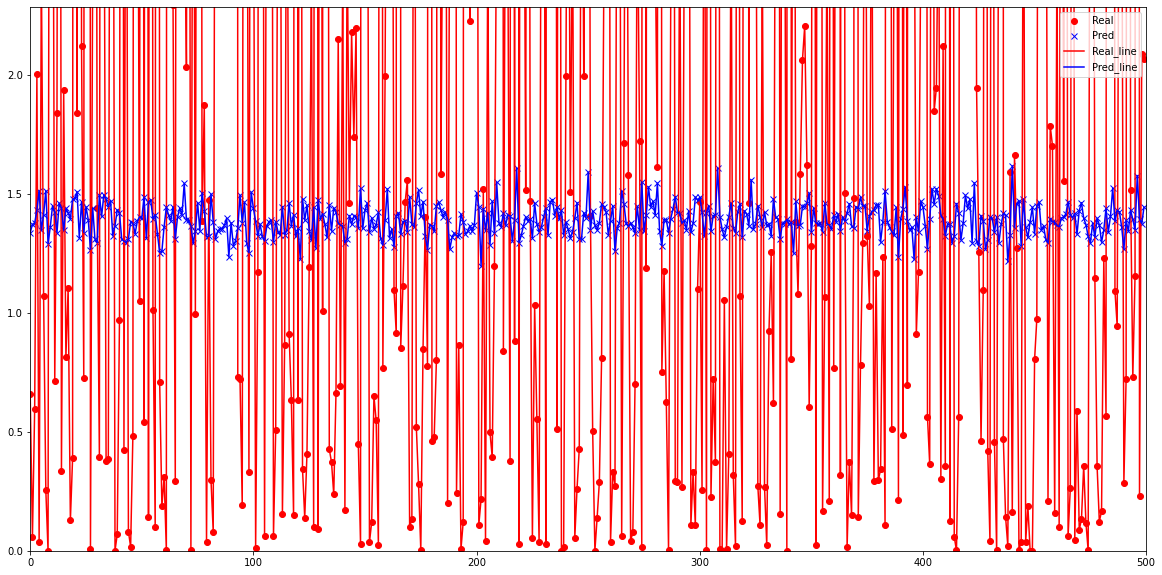

In [131]:
_data_len = 500#len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = max(pred_y.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()

In [149]:
print('hi')

hi


In [4]:
df.head()
df.to_csv('./main_clearNull.csv')

In [5]:
df['_HSCD'] = df['HSCD'].copy()

In [6]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1         12    Algeria     4.605299e+10  1.948099e+10   
1      2017     1         36  Australia     2.284420e+11  1.948099e+10   
4      2017     1         76     Brazil     1.507490e+11  1.948099e+10   
5      2017     1        104    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1        124     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

In [7]:
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = (x+1)
      break
#df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
#df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
#df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
#df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

In [8]:
df.head()

UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

<AxesSubplot:>

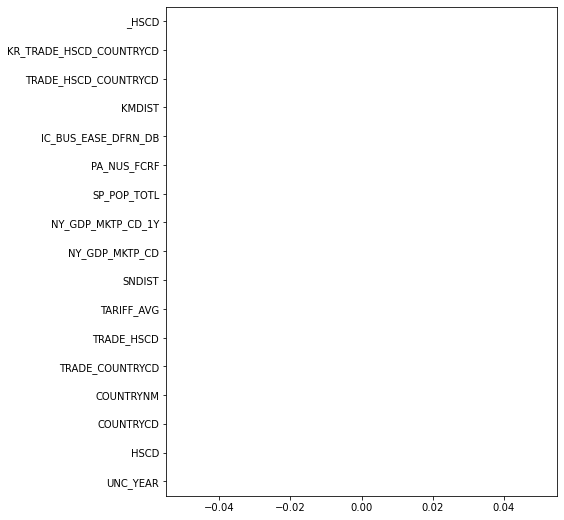

In [9]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [10]:
df.shape


(17269, 17)

In [11]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
4        0.392121
5        4.945077
6        0.652893
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 17269, dtype: float64

In [12]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11  ...   
1         0.0  12203.155980    1.329190e+12       1.208850e+12  ...   
4        18.0   9644.206941    2.062830e+12       1.795700e+12  ...   
5         5.0   5891.659995    6.894587e+10       6.718424e+10  ...   
6         0.0   7911.783801    1.649880e+12       1.528240e+12  ...   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  item_world_percent  \
0                     7657  190590            0.007418            0.017537   
1                  5294788  190590            0.192061            2.252181   
4                   122850  190590            0.020783            0.160822   
5                   631082  190590            0.066283            0.065509   
6                  7273171  190590            0.257627            5.718352   

   gdp_percent  next_year_percent  
0   106.355199           0.224130  
1   109.954916           1.206797  
4   114.876093           0.392121  
5   102.622089           4.945077  
6   107.959483           0.652893  

[5 rows x 21 columns]

In [13]:
copy_df = df.copy()

In [14]:

df['KMDIST'] = df['KMDIST'] / 100
df['SNDIST'] = df['SNDIST'] / 100
df['SP_POP_TOTL'] = (df['SP_POP_TOTL'] - df['SP_POP_TOTL'].min()) / (df['SP_POP_TOTL'].max() - df['SP_POP_TOTL'].min())
# 'SP_POP_TOTL', 
df = df.drop(columns=['_HSCD'])
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM'])
df = df.drop(columns=['KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [15]:
df.head()

HSCD  COUNTRYCD  TARIFF_AVG      SNDIST  SP_POP_TOTL  PA_NUS_FCRF  \
0     1          1        30.0   38.782384     0.027670   110.973017   
1     1          2         0.0  122.031560     0.015534     1.304758   
4     1          3        18.0   96.442069     0.147996     3.191389   
5     1          4         5.0   58.916600     0.036340  1360.358707   
6     1          5         0.0   79.117838     0.024167     1.297936   

   IC_BUS_EASE_DFRN_DB      KMDIST  item_total_percent  item_world_percent  \
0            46.109810   99.540098            0.007418            0.017537   
1            80.223690   83.296523            0.192061            2.252181   
4            55.382403  183.645059            0.020783            0.160822   
5            42.671390   37.961426            0.066283            0.065509   
6            79.540940  106.177031            0.257627            5.718352   

   gdp_percent  next_year_percent  
0   106.355199           0.224130  
1   109.954916           1.206797  
4   114.876093           0.392121  
5   102.622089           4.945077  
6   107.959483           0.652893

In [16]:
df.to_csv('./norm.csv')

In [17]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(17269, 12)
10361 3454 3454


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
torch.manual_seed(1015)
device = torch.device("cuda")

In [19]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [20]:
y_test = y_test.reshape(-1,1)

In [21]:
len(df)

17269

In [22]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

torch.Size([13815, 11])
torch.Size([13815, 1])


In [23]:
# RNN Model Test
import torch.nn as nn

class SingleRNN(nn.Module):

    def __init__(self, input_size, hidden_size, dropout=0, bidirectional=False):
        super(SingleRNN, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_direction = int(bidirectional) + 1
        self.rnn = LSTM(input_size, hidden_size, 1, dropout=dropout, batch_first=True, bidirectional=bidirectional)

    def forward(self, input):
        # input shape: batch, seq, dim
        output = input
        rnn_output, _ = self.rnn(output)
        return rnn_output
deepmodel = SingleRNN(df.shape[1]-1, 256).to(device)
deepmodel.eval()
# https://velog.io/@sjinu/Pytorch-Implementation-code

NameError: name 'LSTM' is not defined

In [26]:
class DeepModel(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(DeepModel, self).__init__()

    self.basic = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, 256)
    self.dropout1 = nn.Dropout(0.5)
    self.bn1 = nn.BatchNorm1d(256)
    self.layer2 = nn.Linear(256, 64)
    self.dropout2 = nn.Dropout(0.5)
    self.bn2 = nn.BatchNorm1d(64)
    self.head = nn.Linear(64, out_channel)

  def forward(self, x):
    x = x.to(device)
    x = self.basic(x)
    x = F.relu(self.bn1(self.layer1(x)))
    x = self.dropout1(x)
    x = F.relu(self.bn2(self.layer2(x)))
    x = self.dropout2(x)
    
    return self.head(x)


# model = nn.Linear(9,1).to(device)
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=11, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

# L2 Loss model

In [ ]:
n_epochs = 100
loss_list = []
for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel(x_train).to(device)
    cost = F.mse_loss(y_train, pred)
    loss_list.append(cost)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)
torch.mean(torch.abs(pred_y - y_test))

# l1 loss model

In [ ]:
deepmodel2 = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-5)

In [ ]:
n_epochs = 5
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel2(x_train).to(device)
    cost = F.l1_loss(y_train, pred)
    loss_list.append(cost)
    with torch.no_grad():
        pred_y = deepmodel2(x_test)
        test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
    optimizer2.zero_grad()
    cost.backward()
    optimizer2.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel2(x_test)
#y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
# loss_l = [(loss_list[i*10] - mi)/(ma - mi) for i in range(int(len(loss_list)/10))]
import numpy as np
count = 100
# loss_l = [np.mean([n.item() for n in loss_list[i*10:i*10+10]]) for i in range(10000) if np.mean([n.item() for n in loss_list[i*10:i*10+10]]) < 100]


loss_l = [loss_list[i].item() for i in range(count)]
loss_l = [np.mean([n.item() for n in loss_list[i*10:i*10+10]]) for i in range(count) if np.mean([n.item() for n in loss_list[i*10:i*10+10]]) < 1000]


loss_test_l = [test_loss_list[i].item() for i in range(count)]
loss_test_l = [np.mean([n.item() for n in test_loss_list[i*10:i*10+10]]) for i in range(count) if np.mean([n.item() for n in test_loss_list[i*10:i*10+10]]) < 1000]

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot([i for i in range(len(loss_l))],loss_l, 'blue', label='Train Loss')
plt.plot([i for i in range(len(test_loss_list))][:count],loss_test_l, 'red', label='Test Loss')
plt.legend(loc='upper right')
plt.show()





In [ ]:
loss_l

In [ ]:
torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')
torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')

# train Fin

# L1 case Start

In [35]:
torch.set_printoptions(sci_mode=False)

In [25]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=11, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [26]:
pred_y = deepmodel(x_test)

In [27]:
pred_y.shape

torch.Size([3454, 1])

In [28]:
y_test = y_test.reshape(-1,1)
y_test

tensor([[    0.0005],
        [    0.1658],
        [    0.0533],
        ...,
        [    0.4124],
        [    0.2739],
        [    6.8481]], device='cuda:0')

In [29]:
pred_y.mean()

tensor(2.6136, device='cuda:0', grad_fn=<MeanBackward0>)

In [30]:
torch.mean(torch.abs(pred_y - y_test))

tensor(4.6064, device='cuda:0', grad_fn=<MeanBackward0>)

# test Field

In [107]:
abs(pred_y - y_test).min()

tensor(0.0028, device='cuda:0', grad_fn=<MinBackward1>)

In [121]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp.iloc[:,3]

16908                    Iran
16910                   Japan
16911              Kazakhstan
16912                  Kuwait
16913                Malaysia
                 ...         
21098    United Arab Emirates
21099                  Turkey
21100                   Egypt
21101          United Kingdom
21102                     USA
Name: COUNTRYNM, Length: 3454, dtype: object

In [126]:
tmp = copy_df.iloc[tr+te:,:].copy()
# 3, 14, 15, 16
arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next
arr = sorted(arr, key=lambda x : abs(x[0] - x[1]))

In [127]:
arr[:10]

[(6.287664413452148,
  6.284905910491943,
  0.002758502960205078,
  1991093839.0,
  125193297,
  'China',
  840890),
 (0.8550779223442078,
  0.8579413890838623,
  0.002863466739654541,
  16243198.0,
  138892,
  'Brazil',
  820320),
 (2.068004608154297,
  2.0750229358673096,
  0.007018327713012695,
  70528230.0,
  1458527,
  'Australia',
  840734),
 (4.616559982299805,
  4.60947847366333,
  0.007081508636474609,
  39207961.0,
  1810059,
  'Philippines',
  840999),
 (0.4036012887954712,
  0.3961523771286011,
  0.007448911666870117,
  73649172.0,
  297249,
  'Chile',
  841391),
 (1.0005733966827393,
  1.0106834173202515,
  0.010110020637512207,
  9238703.0,
  92440,
  'Poland',
  842119),
 (0.6981349587440491,
  0.6872860193252563,
  0.010848939418792725,
  153437531.0,
  1071201,
  'Norway',
  844399),
 (1.3283586502075195,
  1.3403414487838745,
  0.01198279857635498,
  156652117.0,
  2080902,
  'Poland',
  841459),
 (0.6548638343811035,
  0.6396098136901855,
  0.015254020690917969,
  65

In [128]:
arr[-10:]

[(92.46986389160156,
  3.7928061485290527,
  88.67705774307251,
  118502639.0,
  109579232,
  'India',
  842890),
 (102.65850830078125,
  2.5956149101257324,
  100.06289339065552,
  1833623.0,
  1882370,
  'Egypt',
  830230),
 (113.88651275634766,
  8.58624267578125,
  105.3002700805664,
  4900496.0,
  5581004,
  'Viet Nam',
  830710),
 (129.18777465820312,
  12.101070404052734,
  117.08670425415039,
  3011877.0,
  3890977,
  'Iran',
  843120),
 (150.64239501953125,
  4.030820369720459,
  146.6115746498108,
  2653403.0,
  3997150,
  'Kuwait',
  840890),
 (157.72268676757812,
  1.2415977716445923,
  156.48108899593353,
  590215.0,
  930903,
  'Brazil',
  845011),
 (170.12669372558594,
  8.675579071044922,
  161.45111465454102,
  5700485.0,
  9698047,
  'Viet Nam',
  820559),
 (278.2258605957031,
  2.667330503463745,
  275.5585300922394,
  22335305.0,
  62142596,
  'Saudi Arabia',
  841990),
 (364.4615783691406,
  1.538909912109375,
  362.92266845703125,
  4853256.0,
  17688253,
  'Myanm

In [106]:
copy_df.iloc[tr+te:,14:16]

TRADE_HSCD_COUNTRYCD  KR_TRADE_HSCD_COUNTRYCD
16908          6.592452e+07                      300
16910          3.942546e+09                  6534855
16911          4.830666e+07                    25746
16912          1.047815e+08                    99868
16913          2.689531e+08                   489257
...                     ...                      ...
21098          2.198576e+06                    19131
21099          1.687525e+06                    43073
21100          1.708002e+06                     7043
21101          3.555955e+07                    97397
21102          4.810852e+07                  3294503

[3454 rows x 2 columns]

In [141]:
# arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next

res_df = pd.DataFrame()

In [142]:
res_df['percentage - Ground Truth'] = [item[0] for item in arr]
res_df['percentage - Prediction'] = [item[1] for item in arr]
res_df['Diff - Ground Truth & Prediction'] = [item[2] for item in arr]
res_df['previous - trade price'] = [item[3] for item in arr]
res_df['next - trade price'] = [item[4] for item in arr]
res_df['Country'] = [item[5] for item in arr]
res_df['Item Code'] = [item[6] for item in arr]

In [144]:
res_df[:].to_csv('./pred_result.csv')

In [143]:
res_df.head()

percentage - Ground Truth  percentage - Prediction  \
0                   6.287664                 6.284906   
1                   0.855078                 0.857941   
2                   2.068005                 2.075023   
3                   4.616560                 4.609478   
4                   0.403601                 0.396152   

   Diff - Ground Truth & Prediction  previous - trade price  \
0                          0.002759            1.991094e+09   
1                          0.002863            1.624320e+07   
2                          0.007018            7.052823e+07   
3                          0.007082            3.920796e+07   
4                          0.007449            7.364917e+07   

   next - trade price      Country  Item Code  
0           125193297        China     840890  
1              138892       Brazil     820320  
2             1458527    Australia     840734  
3             1810059  Philippines     840999  
4              297249        Chile     841391

In [159]:
pd.concat([res_df.iloc[:10, :], res_df.iloc[-10:, :]]).to_csv('./sortedResult.csv')

In [157]:
res_df.iloc[:10, :]

percentage - Ground Truth  percentage - Prediction  \
0                   6.287664                 6.284906   
1                   0.855078                 0.857941   
2                   2.068005                 2.075023   
3                   4.616560                 4.609478   
4                   0.403601                 0.396152   
5                   1.000573                 1.010683   
6                   0.698135                 0.687286   
7                   1.328359                 1.340341   
8                   0.654864                 0.639610   
9                   4.359214                 4.379110   

   Diff - Ground Truth & Prediction  previous - trade price  \
0                          0.002759            1.991094e+09   
1                          0.002863            1.624320e+07   
2                          0.007018            7.052823e+07   
3                          0.007082            3.920796e+07   
4                          0.007449            7.364917e+07   
5                          0.010110            9.238703e+06   
6                          0.010849            1.534375e+08   
7                          0.011983            1.566521e+08   
8                          0.015254            6.533541e+07   
9                          0.019897            1.154899e+08   

   next - trade price      Country  Item Code  
0           125193297        China     840890  
1              138892       Brazil     820320  
2             1458527    Australia     840734  
3             1810059  Philippines     840999  
4              297249        Chile     841391  
5               92440       Poland     842119  
6             1071201       Norway     844399  
7             2080902       Poland     841459  
8              427858       Norway     841869  
9             5034451        Japan     841869

In [156]:
res_df.iloc[-10:, :]

percentage - Ground Truth  percentage - Prediction  \
3444                  92.469864                 3.792806   
3445                 102.658508                 2.595615   
3446                 113.886513                 8.586243   
3447                 129.187775                12.101070   
3448                 150.642395                 4.030820   
3449                 157.722687                 1.241598   
3450                 170.126694                 8.675579   
3451                 278.225861                 2.667331   
3452                 364.461578                 1.538910   
3453                 863.641418                 2.722790   

      Diff - Ground Truth & Prediction  previous - trade price  \
3444                         88.677058             118502639.0   
3445                        100.062893               1833623.0   
3446                        105.300270               4900496.0   
3447                        117.086704               3011877.0   
3448                        146.611575               2653403.0   
3449                        156.481089                590215.0   
3450                        161.451115               5700485.0   
3451                        275.558530              22335305.0   
3452                        362.922668               4853256.0   
3453                        860.918628               1231656.0   

      next - trade price       Country  Item Code  
3444           109579232         India     842890  
3445             1882370         Egypt     830230  
3446             5581004      Viet Nam     830710  
3447             3890977          Iran     843120  
3448             3997150        Kuwait     840890  
3449              930903        Brazil     845011  
3450             9698047      Viet Nam     820559  
3451            62142596  Saudi Arabia     841990  
3452            17688253       Myanmar     842952  
3453            10637091         Egypt     842952

In [120]:
copy_df.head()

UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11  ...   
1         0.0  12203.155980    1.329190e+12       1.208850e+12  ...   
4        18.0   9644.206941    2.062830e+12       1.795700e+12  ...   
5         5.0   5891.659995    6.894587e+10       6.718424e+10  ...   
6         0.0   7911.783801    1.649880e+12       1.528240e+12  ...   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  item_world_percent  \
0                     7657  190590            0.007418            0.017537   
1                  5294788  190590            0.192061            2.252181   
4                   122850  190590            0.020783            0.160822   
5                   631082  190590            0.066283            0.065509   
6                  7273171  190590            0.257627            5.718352   

   gdp_percent  next_year_percent  
0   106.355199           0.224130  
1   109.954916           1.206797  
4   114.876093           0.392121  
5   102.622089           4.945077  
6   107.959483           0.652893  

[5 rows x 21 columns]

# test Field

In [ ]:
diff_list = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [ ]:
diff_list = np.array(diff_list)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#plt.figure(figsize=(40,5))
#plt.plot(np.arange(4143), [x.item() - y.item() for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
#plt.plot(np.arange(4143), [x.item() for x in ])

In [ ]:
#gt = [y.item() for y in y_test.reshape(-1)]
#pred = [y.item() for y in pred_y.reshape(-1)]
#plt.figure(figsize=(40,5))
#plt.scatter(gt, pred)

In [ ]:
#r = np.corrcoef(gt, pred)
#print (r)

#import scipy.stats as stat
#stat.pearsonr(gt, pred)
#res = stat.linregress(gt, pred)
#print (res)

In [ ]:
import seaborn as sns

## just < 10

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1)) if np.abs(x.item() - y.item()) < 10])


## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) < 1*diff_list.std()]
#(new_diff_list).mean()

In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
#plt.figure(figsize=(1,100))

#fig, ax = plt.subplots()
#ax.boxplot(new_diff_list)

In [ ]:
diff_list = np.sort(diff_list)

In [ ]:
q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

In [ ]:
q3

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
outlier

In [ ]:
r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])
len(r)

In [ ]:
r.mean()

In [ ]:
r1 = np.array([x for x in diff_list if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r)

# L1 case Fin && L2 case Start

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L2.pth"))
deepmodel.eval()

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
y_test.min()

In [ ]:
pred_y.max()

In [ ]:
n = pred_y - y_test
n.max()

In [ ]:
y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
diff_list_L2 = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [ ]:
diff_list_L2 = np.array(diff_list_L2)

In [ ]:
import seaborn as sns

## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [ ]:
diff_list_L2 = np.sort(diff_list_L2)

In [ ]:
q1 = np.percentile(diff_list_L2, 25)
q3 = np.percentile(diff_list_L2, 75)

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
r_l2 = np.array([x for x in diff_list_L2 if (x > q1 - outlier and x < q3 +outlier)])
len(r_l2)

In [ ]:
r_l2.mean()

In [ ]:
r1 = np.array([x for x in diff_list_L2 if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list_L2[np.abs(diff_list_L2) <= 1*diff_list_L2.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r_l2)

# L2 case Finish

In [ ]:
######################

# for bar plot

In [ ]:
outlier_l1_after = np.round(r.mean(), 2)

In [ ]:
outlier_l1_before = np.round(diff_list.mean(), 2)

In [ ]:
outlier_l2_after = np.round(r_l2.mean(), 2)

In [ ]:
outlier_l2_before = np.round(diff_list_L2.mean(), 2)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['L1', 'L2']
before_list = [outlier_l1_before, outlier_l2_before]
after_list = [outlier_l1_after, outlier_l2_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
cnt = 0
tot = []
for i in range(len(res)):
    if res[i] > 20:
        cnt+=1
        tot.append(res[i])

In [ ]:
print(cnt)
sns.distplot(tot)

In [ ]:
df['next_year_percent'].min()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['Selected Features', 'All Features']
outlier_l1_s_before = 4.76

outlier_l1_s_after = 1.98

outlier_l1_a_before = 4.61

outlier_l1_a_after = 1.83


before_list = [outlier_l1_s_before, outlier_l1_a_before]
after_list = [outlier_l1_s_after, outlier_l1_a_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('L1 Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0.6,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [29]:
# !pip install hiddenlayer
import hiddenlayer as hl

In [30]:
transforms = [hl.transforms.Prune('Constant')]

In [31]:
graph = hl.build_graph(deepmodel, x_test, transforms=transforms)

/home/jihoon/anaconda3/lib/python3.8/site-packages/torch/onnx/symbolic_helper.py:443: UserWarning: ONNX export mode is set to inference mode, but operator batch_norm is set to inference mode. The model will be exported in inference, as specified by the export mode.
  warnings.warn("ONNX export mode is set to " + training_mode +
/home/jihoon/anaconda3/lib/python3.8/site-packages/torch/onnx/symbolic_helper.py:443: UserWarning: ONNX export mode is set to inference mode, but operator dropout is set to inference mode. The model will be exported in inference, as specified by the export mode.
  warnings.warn("ONNX export mode is set to " + training_mode +


In [32]:
graph.them = hl.graph.THEMES['blue'].copy()

In [33]:
graph

AttributeError: 'Digraph' object has no attribute '_repr_svg_'

In [171]:
# !pip install torchviz

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=8ef0ac6896c1162532dc81975f0e3b4e6651e6aa9bd459d17dcd1153b48822a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-u_lgx96j/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


In [27]:
from torchviz import make_dot

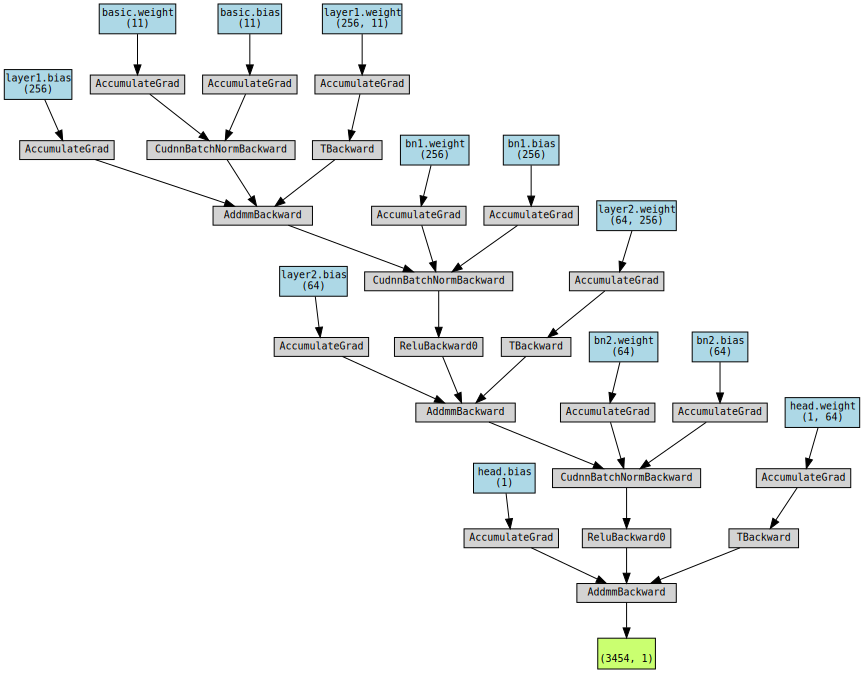

In [28]:
make_dot(deepmodel(x_test), params=dict(list(deepmodel.named_parameters())))

In [44]:
from torchsummary import summary
summary(deepmodel, (df.shape[1]-1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm1d-1                   [-1, 11]              22
            Linear-2                  [-1, 256]           3,072
       BatchNorm1d-3                  [-1, 256]             512
           Dropout-4                  [-1, 256]               0
            Linear-5                   [-1, 64]          16,448
       BatchNorm1d-6                   [-1, 64]             128
           Dropout-7                   [-1, 64]               0
            Linear-8                    [-1, 1]              65
Total params: 20,247
Trainable params: 20,247
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.08
Estimated Total Size (MB): 0.08
----------------------------------------------------------------


In [36]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
